# Regression Predict - Team EG3: Intelli Data

© Explore Data Science Academy

---
### Honour Code

I {**Christelle Coetzee, Destiny Owobu, Anthonia Omonayin, Edidiong Michael Udofia, Mashako Justice Manyelo, Pricilla Vhafuniwa Ndou**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1085]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Libraries that helps with statistical methods and visualizations
from  scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.tree import plot_tree

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
import catboost as cb 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb



# Setting global constants to ensure notebook results are reproducible
TRAIN_TEST_VAR = 0.2 #Variable indicating the ratio of Training to Testing data when splitting datasets for validation
K_FOLD = 10 #Variable used during k-fold validation processes
RAND_STATE = 42 #Variable used to determine random state of methods in order to replicate model training results

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file, as well as the `df_test` file, into a DataFrame. |

---

In [1086]:
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="four"></a>
## 3. Data Overview
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data overview ⚡ |
| :--------------------------- |
| In this section we will look at the data and determine if there are any missing values, redundant columns, or object data that need to be converted into numerical data. |

---

#### **3.1. Data Overview**:

We employ the `head()` function to examine the initial two rows of our dataset. This preliminary inspection enables us to discern the nature of our data effectively. Through this examination, we classify columns into distinct categories: categorical and numerical. Presently, our dataset comprises a specific number of columns in each category, providing valuable insights into the composition of our data. This meticulous categorization forms the foundation for our subsequent data preprocessing and modeling endeavors.

In [1087]:
df.head(2)

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0                1.0  ...       265.938000      281.013000   
1                0.0                1.0  ...       266.386667      280.561667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  

[2 rows x 49 columns]

In reviewing the provided dataframe, several key observations come to light:

- There is an `Unnamed: 0 column`, which appears to duplicate the dataframe's index.
- The time column captures the date and time corresponding to the data collection instances.
- The dataset contains multiple weather-related variables from various cities across Spain.
- Notably, the predictor variables are followed by our target variable, `load_shortfall_3h`, which occupies the final column in our dataframe. This structured arrangement facilitates a clear distinction between predictor and target variables, crucial for subsequent analysis and modeling endeavors.

The `shape()` function is employed to ascertain the dimensions of our data. Specifically, this method provides us with the count of rows and columns present in the dataset. Understanding the size of our dataset is fundamental to structuring our analysis and implementing appropriate data processing techniques.

In [1088]:
df.shape 

(8763, 49)

In [1089]:
df_test.shape 

(2920, 48)

Upon applying the `shape()` function, it is revealed that our dataset comprises 8763 rows and 49 columns. It is important to note that the test train dataset only has 2920 rows and 48 colums, since it doen't include our y-variable, `load_shortfall_3h`. This comprehensive understanding of the dataset's dimensions serves as a cornerstone for our subsequent data analysis, feature engineering, and model development processes.

Given the expansive nature of our dataset with 49 columns, it is impractical to visualize all the columns simultaneously. To gain insight into the available features, we employ the `df_train.columns` attribute. This allows us to view the names of all the columns, providing a concise overview of the variables at our disposal.

In [1090]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

We utilize the `info()` function. This method offers a comprehensive summary of our dataset, providing crucial information such as the presence of categorical and numerical features, as well as detecting any null or missing values. By leveraging this function, we ensure a thorough understanding of our data's structure, enabling us to address potential data inconsistencies and prepare a clean, reliable dataset for our analytical and modeling endeavors.

In [1091]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In our comprehensive data summary, several key insights emerge:

- The majority of our data is numeric, although exceptions include the time, `Valencia_wind_deg`, and `Seville_pressure` columns.
- Our dataset comprises 8763 entries and encompasses 49 columns, with `load_shortfall_3h` serving as the target variable.
- Notably, upon closer inspection, it becomes apparent that the `Valencia_pressure` column contains fewer non-null values, suggesting the presence of missing data for this particular variable.

To facilitate a robust Exploratory Data Analysis (EDA), it is imperative to conduct preliminary data cleaning and organization within our dataframe. 

<a id="four"></a>
## 4. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data cleaning ⚡ |
| :--------------------------- |
| Now that we have determined the missing values, redundant columns, and incorrect data types, we need to clean the data in order for it to be workable and reliable. |

---

#### **4.1. Remove Missing and Redundant Features in Both The `Train` and `Test` Datasets**:

To maintain a clear demarcation between the cleaned and original datasets, we will create a new dataset named `df_clean`. This separation ensures that our cleaned data remains distinct and preserved, allowing us to conduct analysis and modeling on a curated dataset while retaining the integrity of the original data for reference and comparative purposes.

In [1092]:
df_clean = df

Our initial cleaning step involves the removal of the `Unnamed: 0` column, which is redundant given the presence of an existing indexing column. This elimination optimizes the structure of our dataset, enhancing clarity and simplifying subsequent data analysis and modeling processes.

In [1093]:
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [1094]:
df_test.drop(columns=['Unnamed: 0'], inplace=True)

As a part of our data cleansing process, we will address the null values in the `Valencia_pressure` column. To do so, we will replace these missing values with the mode of the column. Utilizing the mode as the replacement strategy is appropriate for 'pressure' variables, as it signifies the most frequently occurring value and aligns with the nature of the data. This approach ensures the integrity of our dataset by imputing missing values with the most representative and common pressure reading.

In [1095]:
print('Mode:') 
print(df['Valencia_pressure'].mode())

Mode:
0    1018.0
Name: Valencia_pressure, dtype: float64


In [1096]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [1097]:
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

"To validate the success of our data cleaning procedure, we can use the `df_clean['Valencia_pressure'].isnull().sum()` function. This expression allows us to check if there are any remaining null values specifically within the 'Valencia_pressure' column of the cleaned dataset (df_clean). 

In [1098]:
vptr = df_clean.Valencia_pressure.isnull().sum()

print('Valencia_pressure in the train dataset now has ' + str(vptr) + ' missing values.')

Valencia_pressure in the train dataset now has 0 missing values.


In [1099]:
vpts = df_test.Valencia_pressure.isnull().sum()

print('Valencia_pressure in the test dataset now has ' + str(vpts) + ' missing values.')

Valencia_pressure in the test dataset now has 0 missing values.


A zero count of null values in this column confirms the effectiveness of our imputation method, ensuring the absence of missing data in the specified column after our cleaning process.

#### **4.2. Create New Features**:

##### 4.2.1. Covert 'time' into datetime:

As part of feature engineering, we will transform the 'time' column into a datetime format. This conversion is essential for working with temporal data, allowing us to perform time-based analysis and modeling. By converting the 'time' column to datetime format, we enhance the usability of this information, enabling more sophisticated insights into our dataset.

In [1100]:
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [1101]:
df_test['time'] = pd.to_datetime(df_test['time'])

As an additional feature, we will create a new variable that represents the hour of the day based on the 'time' column. Extracting the hour information is valuable for time-based analysis, allowing us to discern patterns and trends related to specific hours. This new variable will provide a granular perspective on our data, enhancing our ability to explore time-sensitive relationships within the dataset.

In [1102]:
df_clean['hourofday'] = df_clean['time'].dt.hour

In [1103]:
df_test['hourofday'] = df_test['time'].dt.hour

To ensure the successful transformation, we can use the `df_clean['hourofday']` function and confirm that the data is now represented as integers. This verification step ensures that the 'hourofday' variable has been correctly processed and is in the desired integer data type, enabling seamless integration into our analysis and modeling workflows.

In [1104]:
df_clean['hourofday']

0        3
1        6
2        9
3       12
4       15
        ..
8758     9
8759    12
8760    15
8761    18
8762    21
Name: hourofday, Length: 8763, dtype: int32

In [1105]:
df_test['hourofday']

0        0
1        3
2        6
3        9
4       12
        ..
2915     9
2916    12
2917    15
2918    18
2919    21
Name: hourofday, Length: 2920, dtype: int32

##### 4.2.2. Seperate the 'time' and 'date':

As part of data preprocessing, we will split the 'time' column into separate 'date' and 'time' columns. This separation allows us to independently analyze date-related patterns. By organizing the data in this manner, we enhance the granularity of our analysis, enabling more focused exploration of temporal aspects in our dataset.

In [1106]:
df_clean['date'] = df_clean['time'].dt.date
df_clean['time'] = df_clean['time'].dt.time

In [1107]:
df_test['date'] = df_test['time'].dt.date
df_test['time'] = df_test['time'].dt.time

##### 4.2.3. Covert the 'date' into datetime:

To facilitate proper handling and analysis of the 'date' column, we will convert it into datetime format. This conversion ensures that date-related operations can be performed accurately, allowing for meaningful temporal analysis and modeling.

In [1108]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [1109]:
df_test['date'] = pd.to_datetime(df_test['date'])

##### 4.2.4. Seperate the 'date' into 'year', 'month', 'day', and 'season':

As part of our data processing, we will extract the year, month, and day information from the 'date' column. This extraction process will yield separate variables representing the year, month, and day, allowing for detailed temporal analysis at different levels of granularity. By extracting these components, we enhance our ability to explore and understand date-related patterns within the dataset.

In [1110]:
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day

In [1111]:
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

In the process of data preparation, a function has been defined to rigorously classify months into distinct seasonal categories. This meticulous categorization is essential for precise temporal analysis, allowing for in-depth exploration of seasonal patterns within the dataset.

In [1112]:
def get_season(month):
    if month in [3, 4, 5]:  # Spring: March (3) to May (5)
        return 2 # 2 = spring, coverted to an int for workability
    elif month in [6, 7, 8]:  # Summer: June (6) to August (8)
        return 3 # 3 = summer, coverted to an int for workability
    elif month in [9, 10, 11]:  # Autumn: September (9) to November (11)
        return 4 # 4 = autumn, coverted to an int for workability
    else:  # Winter: December (12), January (1), February (2)
        return 1 # 1 = winter, coverted to an int for workability

As a strategic step in our data transformation process, we have applied the meticulously crafted function to create a new column named 'season.' 

In [1113]:
df_clean['season'] = df_clean['month'].apply(get_season)

In [1114]:
df_test['season'] = df_test['month'].apply(get_season)

We have created a new DataFrame featuring key temporal attributes. This includes the 'year', 'month', 'day', and 'season' columns, meticulously extracted and classified from the original dataset. This refined DataFrame serves as a comprehensive temporal representation of our data, providing essential granularity for our analytical pursuits. The inclusion of these structured features enhances our dataset's depth, ensuring it is poised for rigorous exploration and advanced modeling methodologies.

##### 4.2.5. Remove the 'time' and 'date' column:

In our meticulous data preparation, we have identified both the 'time' and 'date' columns as redundant following the creation of more granular temporal features such as 'hourofday', 'year', 'month', 'day', and 'season'. Consequently, we have prudently removed these redundant columns. This strategic decision streamlines our dataset, eliminating unnecessary information and promoting a streamlined, efficient structure. By eliminating these superfluous columns, we enhance the precision and focus of our data, reinforcing its readiness for advanced analytical methodologies and modeling processes.

In [1115]:
df_clean.drop(columns=['time'], inplace=True)

In [1116]:
df_test.drop(columns=['time'], inplace=True)

In [1117]:
df_clean.drop(columns=['date'], inplace=True)

In [1118]:
df_test.drop(columns=['date'], inplace=True)

In order to validate the applied enhancements, we will meticulously examine the initial two rows of the refined DataFrame. This critical step ensures the accuracy and integrity of our data processing procedures, setting the stage for a robust and reliable modeling process.

In [1119]:
df_clean.head(2)

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667           level_5             0.0             0.666667   
1           0.333333          level_10             0.0             1.666667   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0                1.0   
1         78.333333        64.666667                0.0                1.0   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp_max  \
0                 0.0       223.333333  ...       269.338615   
1                 0.0       221.000000  ...       270.376000   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  \
0        274.254667   265.938000       265.938000        6715.666667   
1        274.945000   266.386667       266.386667        4171.666667   

  hourofday  year  month  day  season  
0         3  2015      1    1       1  
1         6  2015      1    1       1  

[2 rows x 52 columns]

In [1120]:
df_test.head(2)

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           5.000000           level_8             0.0             5.000000   
1           4.666667           level_8             0.0             5.333333   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0              87.0        71.333333               20.0           3.000000   
1              89.0        78.000000                0.0           3.666667   

   Seville_clouds_all  Bilbao_wind_deg  ...  Barcelona_temp_min  \
0                 0.0       193.333333  ...          286.816667   
1                 0.0       143.333333  ...          283.483333   

   Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min hourofday  \
0           285.15            283.15   279.866667           279.15         0   
1           284.15            281.15   279.193333           278.15         3   

   year  month  day  season  
0  2018      1    1       1  
1  2018      1    1       1  

[2 rows x 51 columns]

When scrolling to the conclusion of the dataset, one can observe the integration of the newly created columns.

##### 4.2.6. Convert 'Valencia_wind_deg' into an int:

To refine the 'Valencia_wind_deg' column further, we will extract only the numerical values.

In [1121]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

In [1122]:
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')

Next, we will transform the 'Valencia_wind_deg' column to a numeric data type. his conversion ensures uniform numerical representation, aligning with the datatype requirements for precise analysis and modeling.

In [1123]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [1124]:
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

To validate the successful transformation, we will conduct a verification check to confirm the 'Valencia_wind_deg' column has been converted to the numeric data type.

In [1125]:
df_clean.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

In [1126]:
df_test.Valencia_wind_deg

0        8
1        8
2        7
3        7
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 2920, dtype: int64

As evident from the current data representation, the 'Valencia_wind_deg' column has been successfully transformed into an integer data type. This confirmation reaffirms the accuracy of our data processing steps, ensuring a seamless transition to a numeric format.

##### 4.2.7. Convert 'Seville_pressure' into an int:

To refine the 'Seville_pressure' column further, we will extract only the numerical values.

In [1127]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

In [1128]:
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')

Next, we will transform the 'Seville_pressure' column to a numeric data type. his conversion ensures uniform numerical representation, aligning with the datatype requirements for precise analysis and modeling.

In [1129]:
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])

In [1130]:
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

To validate the successful transformation, we will conduct a verification check to confirm the 'Seville_pressure' column has been converted to the numeric data type.

In [1131]:
df_clean.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

In [1132]:
df_test.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 2920, dtype: int64

#### **4.3 Engineer Existing Features**:

##### 4.3.1. Change the order of the columns:

As a part of our data organization strategy, we will rearrange the columns based on the cities for enhanced convenience and readability. This restructuring will optimize the presentation of our data, ensuring a logical and intuitive arrangement. Crucially, we will preserve the y-value, 'load_shortfall_3h', at the very end of the dataset. This meticulous ordering not only fosters clarity but also facilitates streamlined data interpretation and analysis, setting the stage for effective modeling and insights extraction.

In [1133]:
desired_column_order = ['season' ,'year', 'month', 'day', 'hourofday', 'Barcelona_weather_id' , 'Barcelona_wind_speed', 
                        'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 'Barcelona_temp_max' , 'Barcelona_rain_1h', 
                        'Barcelona_rain_3h' , 'Barcelona_pressure', 'Bilbao_weather_id' , 'Bilbao_wind_speed' , 'Bilbao_wind_deg' , 
                        'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure',
                        'Bilbao_clouds_all', 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,
                        'Madrid_rain_1h' , 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity', 'Seville_weather_id' , 'Seville_wind_speed' , 
                        'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 'Seville_rain_3h' , 'Seville_pressure' , 
                        'Seville_clouds_all' , 'Seville_humidity', 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 
                        'Valencia_temp_min' , 'Valencia_snow_3h' , 'Valencia_pressure', 'Valencia_humidity', 'load_shortfall_3h']
df_clean = df_clean[desired_column_order]

In [1134]:
desired_column_order_test = ['season' ,'year', 'month', 'day', 'hourofday', 'Barcelona_weather_id' , 'Barcelona_wind_speed', 
                        'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 'Barcelona_temp_max' , 'Barcelona_rain_1h', 
                        'Barcelona_rain_3h' , 'Barcelona_pressure', 'Bilbao_weather_id' , 'Bilbao_wind_speed' , 'Bilbao_wind_deg' , 
                        'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure',
                        'Bilbao_clouds_all', 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,
                        'Madrid_rain_1h' , 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity', 'Seville_weather_id' , 'Seville_wind_speed' , 
                        'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 'Seville_rain_3h' , 'Seville_pressure' , 
                        'Seville_clouds_all' , 'Seville_humidity', 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 
                        'Valencia_temp_min' , 'Valencia_snow_3h' , 'Valencia_pressure', 'Valencia_humidity']
df_test = df_test[desired_column_order_test]

In [1135]:
df_clean

season  year  month  day  hourofday  Barcelona_weather_id  \
0          1  2015      1    1          3                 800.0   
1          1  2015      1    1          6                 800.0   
2          1  2015      1    1          9                 800.0   
3          1  2015      1    1         12                 800.0   
4          1  2015      1    1         15                 800.0   
...      ...   ...    ...  ...        ...                   ...   
8758       1  2017     12   31          9                 801.0   
8759       1  2017     12   31         12                 801.0   
8760       1  2017     12   31         15                 801.0   
8761       1  2017     12   31         18                 800.0   
8762       1  2017     12   31         21                 800.0   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 6.333333           42.666667      281.013000   
1                 4.000000          139.000000      280.561667   
2                 2.000000          326.000000      281.583667   
3                 2.333333          273.000000      283.434104   
4                 4.333333          260.000000      284.213167   
...                    ...                 ...             ...   
8758              1.666667           83.666667      281.276667   
8759              3.000000          213.333333      287.483333   
8760              5.333333          256.666667      289.816667   
8761              5.333333          250.000000      287.523333   
8762              4.333333          253.333333      287.483333   

      Barcelona_temp_min  ...  Seville_humidity  Valencia_wind_speed  \
0             281.013000  ...         74.333333             0.666667   
1             280.561667  ...         78.333333             1.666667   
2             281.583667  ...         71.333333             1.000000   
3             283.434104  ...         65.333333             1.000000   
4             284.213167  ...         59.000000             1.000000   
...                  ...  ...               ...                  ...   
8758          280.483333  ...         89.000000             2.666667   
8759          287.150000  ...         82.000000             2.000000   
8760          289.150000  ...         67.666667             7.333333   
8761          286.816667  ...         67.666667             7.333333   
8762          287.150000  ...         78.666667             7.000000   

      Valencia_wind_deg  Valencia_temp  Valencia_temp_max  Valencia_temp_min  \
0                     5     269.888000         269.888000         269.888000   
1                    10     271.728333         271.728333         271.728333   
2                     9     278.008667         278.008667         278.008667   
3                     8     284.899552         284.899552         284.899552   
4                     7     283.015115         283.015115         283.015115   
...                 ...            ...                ...                ...   
8758                  6     282.483333         282.483333         282.483333   
8759                  6     291.816667         291.816667         291.816667   
8760                  9     290.706333         290.706333         290.706333   
8761                  8     290.483333         290.483333         290.483333   
8762                  9     289.483333         289.483333         289.483333   

      Valencia_snow_3h  Valencia_pressure  Valencia_humidity  \
0                  0.0        1002.666667          75.666667   
1                  0.0        1004.333333          71.000000   
2                  0.0        1005.333333          65.666667   
3                  0.0        1009.000000          54.000000   
4                  0.0        1018.000000          58.333333   
...                ...                ...                ...   
8758               0.0        1018.000000          71.333333   
8759               0.0        1021.000000          40.333333   
8760  

In [1136]:
df_test

season  year  month  day  hourofday  Barcelona_weather_id  \
0          1  2018      1    1          0            800.000000   
1          1  2018      1    1          3            800.333333   
2          1  2018      1    1          6            800.000000   
3          1  2018      1    1          9            800.000000   
4          1  2018      1    1         12            800.333333   
...      ...   ...    ...  ...        ...                   ...   
2915       1  2018     12   31          9            800.000000   
2916       1  2018     12   31         12            800.000000   
2917       1  2018     12   31         15            800.000000   
2918       1  2018     12   31         18            800.000000   
2919       1  2018     12   31         21            800.000000   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 4.000000          176.666667      287.356667   
1                 4.666667          266.666667      284.190000   
2                 4.000000          263.333333      283.150000   
3                 2.333333           86.666667      283.190000   
4                 4.666667          283.333333      286.816667   
...                    ...                 ...             ...   
2915              6.333333          320.000000      278.140000   
2916              2.666667          293.333333      286.150000   
2917              2.666667          233.333333      288.820000   
2918              2.333333          253.333333      284.473333   
2919              4.666667          310.000000      281.133333   

      Barcelona_temp_min  ...  Seville_clouds_all  Seville_humidity  \
0             286.816667  ...            0.000000         87.000000   
1             283.483333  ...            0.000000         89.000000   
2             281.816667  ...            6.666667         89.000000   
3             282.150000  ...            6.666667         93.333333   
4             286.150000  ...            0.000000         65.333333   
...                  ...  ...                 ...               ...   
2915          276.483333  ...            0.000000         81.666667   
2916          285.816667  ...            0.000000         61.000000   
2917          288.150000  ...            0.000000         47.000000   
2918          283.150000  ...            0.000000         52.666667   
2919          278.483333  ...            0.000000         61.666667   

      Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
0                5.000000                  8     287.483333   
1                5.333333                  8     284.150000   
2                5.000000                  7     282.816667   
3                5.333333                  7     283.483333   
4                8.666667                  7     287.150000   
...                   ...                ...            ...   
2915             2.000000                  9     279.323333   
2916             1.333333                  8     290.323333   
2917             3.000000                  6     293.483333   
2918             2.000000                  6     285.976667   
2919             2.333333                 10     280.313333   

      Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
0            287.483333         287.483333                 0   
1            284.150000         284.150000                 0   
2            282.816667         282.816667                 0   
3            283.483333         283.483333                 0   
4            287.150000         287.150000                 0   
...                 ...                ...               ...   
2915         279.816667         278.816667                 0   
2916         290.816667         289.816667                 0   
2917         293.483333         293.483333                 0   
2918         286.483333         285.483333                 0   
2919         281.150000         279.483333                 0   

      Valencia_pressure  Vale

With the completion of our data cleansing process and the meticulous arrangement of columns in a logical order, our dataset now stands as a refined and organized foundation for our analytical endeavors. This structured approach ensures data coherence, enhancing our ability to extract meaningful insights and develop robust models. The methodical organization of the dataset sets the stage for rigorous analysis, reinforcing the reliability and integrity of our research efforts.

<a id="three"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the DataFrame. |

---


#### **5.1. Data breakdown:**

Given the extensive nature of our dataset, to facilitate a more comprehensive understanding, we will partition it into manageable sections. This approach enables us to delve into specific segments of the data systematically, promoting a thorough exploration and insightful analysis. Breaking down the dataset in this manner ensures that each part receives due attention, allowing for a meticulous examination of the underlying patterns and trends, thus enhancing the depth and accuracy of our analysis.

##### 5.1.1. df_time_y:

In the creation of the first section, denoted as 'df_1', we have meticulously curated specific columns essential for our analysis. This refined subset includes 'hourofday', 'year', 'month', 'day', 'season', and 'load_shortfall_3h'. By isolating these key features, 'df_1' encapsulates the temporal, seasonal, and target variables critical for our modeling endeavors. This focused approach allows for a detailed examination of the dataset's temporal and target-related patterns, providing a foundational segment for our in-depth analysis.

In [1137]:
df_time_y = df_clean[['hourofday', 'year', 'month', 'day', 'season', 'load_shortfall_3h']]

Let's examine the initial two rows of the 'df_time_y' DataFrame to gain an initial insight into this specifically curated subset.

In [1138]:
df_time_y.head(2)

hourofday  year  month  day  season  load_shortfall_3h
0          3  2015      1    1       1        6715.666667
1          6  2015      1    1       1        4171.666667

Let us begin our analysis by directing our attention towards the focal point of our study, the target variable `load_shortfall_3h`. This variable represents a crucial aspect of our dataset, embodying the essence of our predictive modeling endeavor. 

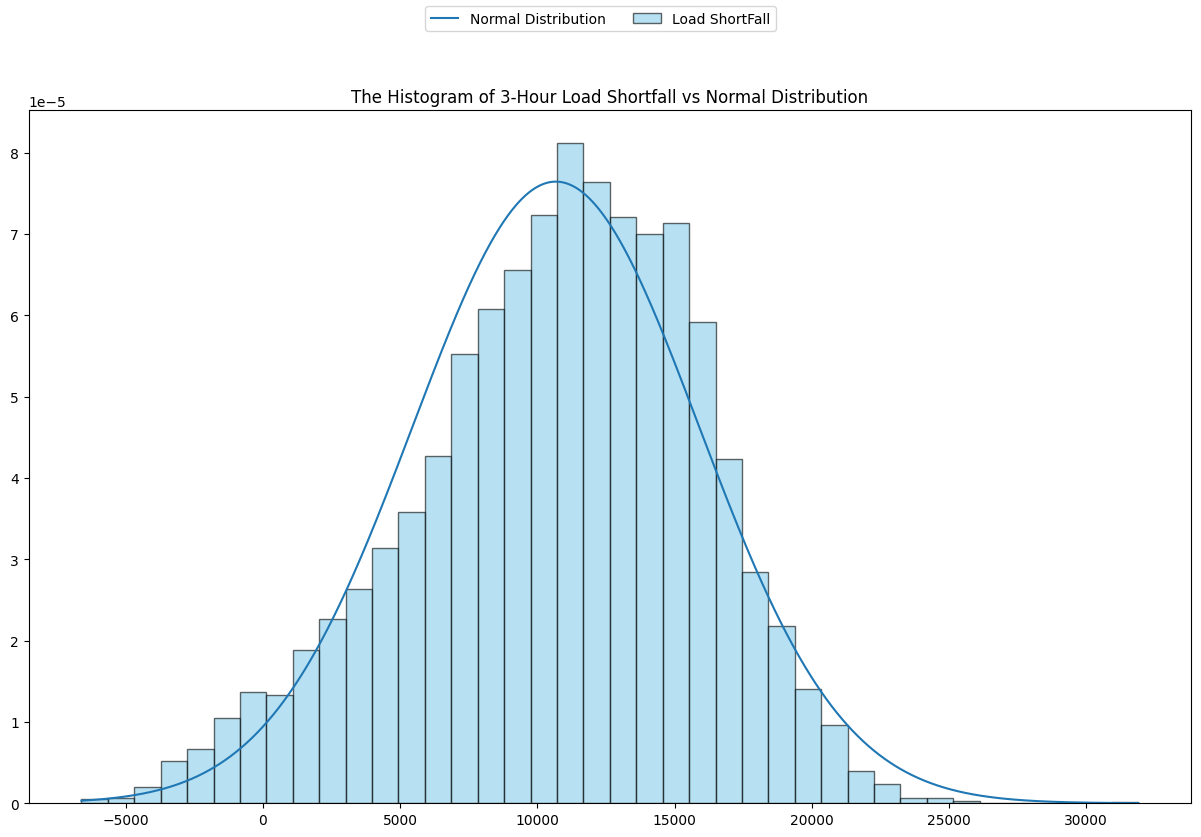

In [1139]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(15,9))

# Calculate important metrics from dataframe
mean_val =  df_time_y['load_shortfall_3h'].mean()
std_dev = df_time_y['load_shortfall_3h'].std()
min_val, max_val = df_clean['load_shortfall_3h'].min(), df_clean['load_shortfall_3h'].max()

# Plot the theoretical normal distribution of target variable
x = np.linspace(min_val, max_val, 1000)
ax.plot(x, norm.pdf(x, mean_val, std_dev), label = "Normal Distribution")

# Plot the normalized histogram of target variable
ax.hist(df_clean['load_shortfall_3h'].values,
        alpha=0.6,
        label='Load ShortFall',
        bins=40,
        density=True,
        color='skyblue', 
        edgecolor='black'
       )

# Set title of figure
ax.set_title("The Histogram of 3-Hour Load Shortfall vs Normal Distribution")

# Create lines and labels for use in legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Insert figure legend and show the final figure
fig.legend(lines, labels, loc='upper center', ncol=2)
plt.show()

We see that our target variable is slightly skewed to the left from an ideal normal distribution. This can also be shown when we investigate the skew and kurtosis of our data explicitly, as done below.

In [1140]:
print(f"The Skew is {df_time_y.load_shortfall_3h.skew()}")
print(f"The Kurtosis is {df_time_y.load_shortfall_3h.kurtosis()}")

The Skew is -0.384847070902431
The Kurtosis is -0.11899877049908492


Upon analyzing our target variable, `load_shortfall_3h`, we observe a negative skewness, suggesting a slightly more pronounced tail on the left side of the distribution. This indicates that there are more values clustered to the right of the mean, indicating a leftward skew. The relatively small skew value signifies a fairly symmetric distribution of our target variable. Furthermore, the low kurtosis value suggests a lack of outliers, indicating a relatively tight distribution. These statistical insights provide valuable context, guiding our understanding of the variable's distribution and aiding in the formulation of our modeling strategies.

Next, let's look at some descriptive statistics for the rest of our variables:

In [1141]:
df_time_y.describe()

hourofday         year        month          day       season  \
count  8763.000000  8763.000000  8763.000000  8763.000000  8763.000000   
mean     10.498459  2016.000571     6.524820    15.740157     2.503595   
std       6.874031     0.816054     3.447976     8.798664     1.114565   
min       0.000000  2015.000000     1.000000     1.000000     1.000000   
25%       4.500000  2015.000000     4.000000     8.000000     2.000000   
50%       9.000000  2016.000000     7.000000    16.000000     3.000000   
75%      15.000000  2017.000000    10.000000    23.000000     3.000000   
max      21.000000  2017.000000    12.000000    31.000000     4.000000   

       load_shortfall_3h  
count        8763.000000  
mean        10673.857612  
std          5218.046404  
min         -6618.000000  
25%          7390.333333  
50%         11114.666667  
75%         14498.166667  
max         31904.000000

In an effort to enhance the interpretability of our dataset, we acknowledge the challenges posed by the current tabular representation. To address this, we will categorize our variables based on their skewness. Variables demonstrating significant departure from symmetry will be labeled as heavily skewed, those with moderate skewness will be categorized as moderately skewed, and those exhibiting relative symmetry will be identified as relatively symmetrical. This classification will not only streamline our understanding of the dataset but also pave the way for a more intuitive and insightful analysis.

In [1142]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_time_y.drop('load_shortfall_3h', axis=1).skew().to_frame()

# Display variables with high skewness
Highly_Pos_Skew = skew_df[(skew_df[0] >= 1)]
Highly_Neg_Skew = skew_df[(skew_df[0] <= -1)]
print("High positive skew:", Highly_Pos_Skew, "\n \n")
print("High negative skew:", Highly_Neg_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Pos_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Neg_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate positive skew:", Mod_Pos_Skew, "\n \n")
print("Moderate negative skew:", Mod_Neg_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

High positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

High negative skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate negative skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                   0
hourofday  0.000719
year      -0.001048
month     -0.009544
day        0.005984
season    -0.003834 
 



Upon a careful analysis of the variables in this section, it is evident that all the data exhibits a relatively symmetrical distribution. This symmetry implies a balanced distribution of values, contributing to a stable and predictable pattern within these features. The absence of heavily skewed or excessively skewed variables in this context underscores the dataset's balanced nature, allowing for a more straightforward interpretation and modeling process. This observation provides valuable insights, affirming the stability and uniformity of the data in this specific section.

Let's repeat the same process for calculating the Kurtosis:

In [1143]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_time_y.drop('load_shortfall_3h', axis=1).kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers): Empty DataFrame
Columns: [0]
Index: [] 
 

Low kurtosis (Small amount of outliers):                   0
hourofday -1.237868
year      -1.498369
month     -1.207760
day       -1.193873
season    -1.351966 
 



Similarly, our analysis indicates a low kurtosis across the dataset, signifying a limited presence of outliers within the variables. The low kurtosis values reinforce the observation of a relatively tight distribution, indicating that the majority of data points are clustered near the mean. This characteristic enhances the dataset's stability and consistency, reinforcing the reliability of our data and bolstering the foundation for our subsequent analytical and modeling efforts.

Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. These visualizations will not only corroborate the metrics calculated earlier but also offer nuanced insights into the distributional patterns of each variable. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

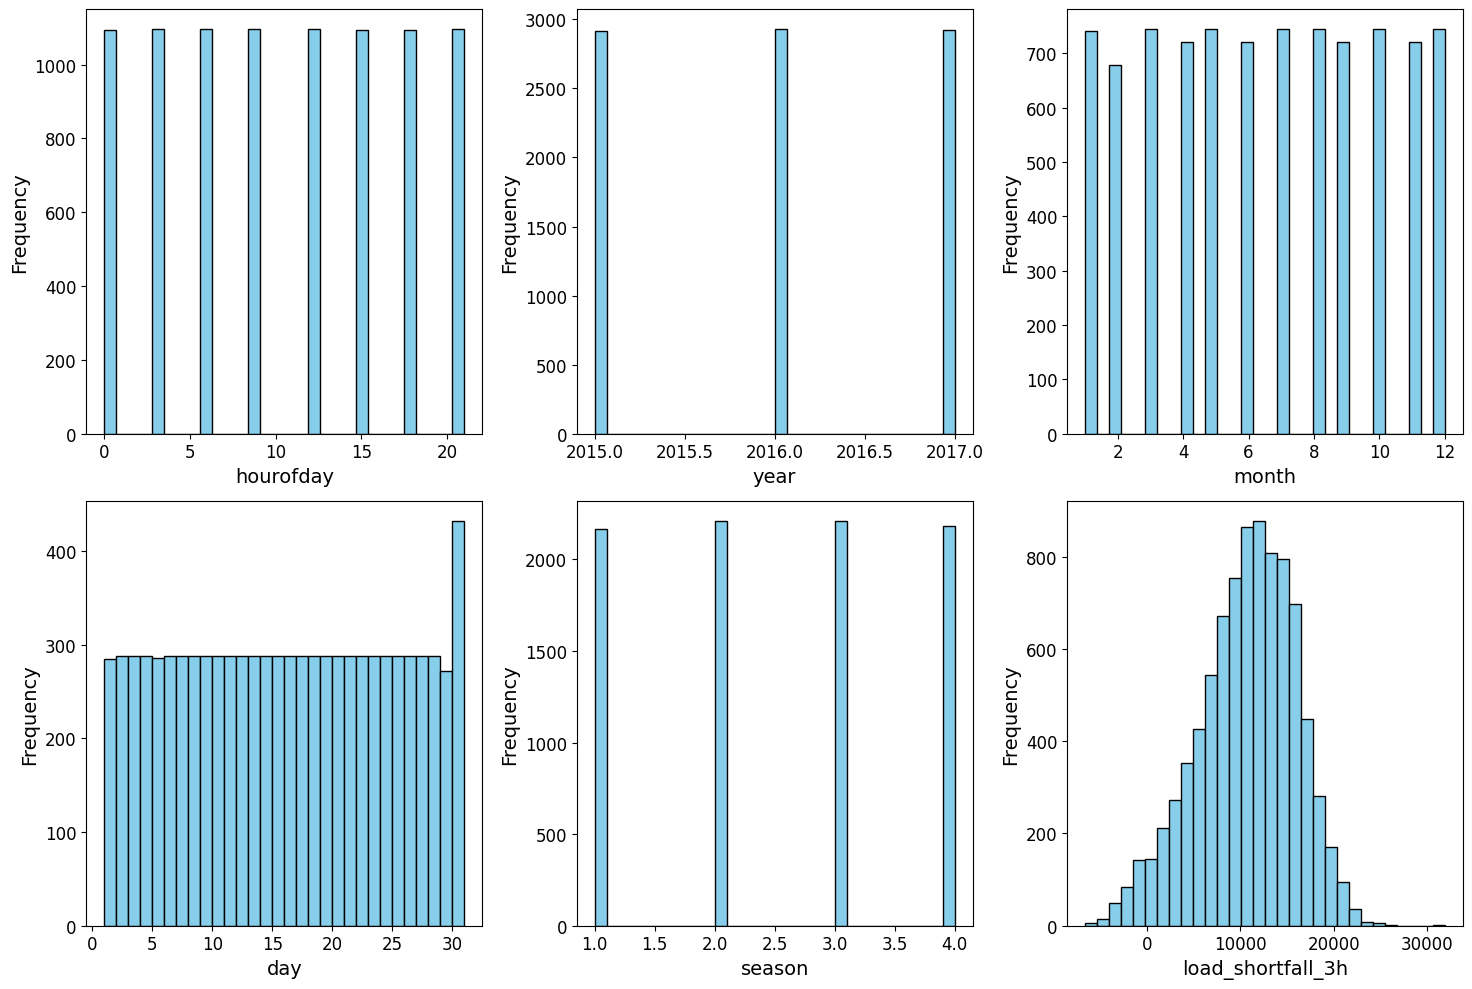

In [1144]:
# Define the number of rows and columns for subplots
number_of_rows = 2  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_time_y.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_time_y[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In this section, the data exhibits a generally uniform distribution, with subtle variations. February stands out with a noticeable decrease in frequency, indicating a unique pattern specific to this month. Additionally, there is a discernible increase in frequency on the last day of each month.

To gain a more direct and focused insight into the relationship between 'load_shortfall_3h' and 'month', we will visualize this interaction using a boxplot. This graphical representation will provide a clear and concise depiction of how energy load shortfalls vary across different months, enabling us to discern any prominent patterns, seasonal trends, or outliers in the data.

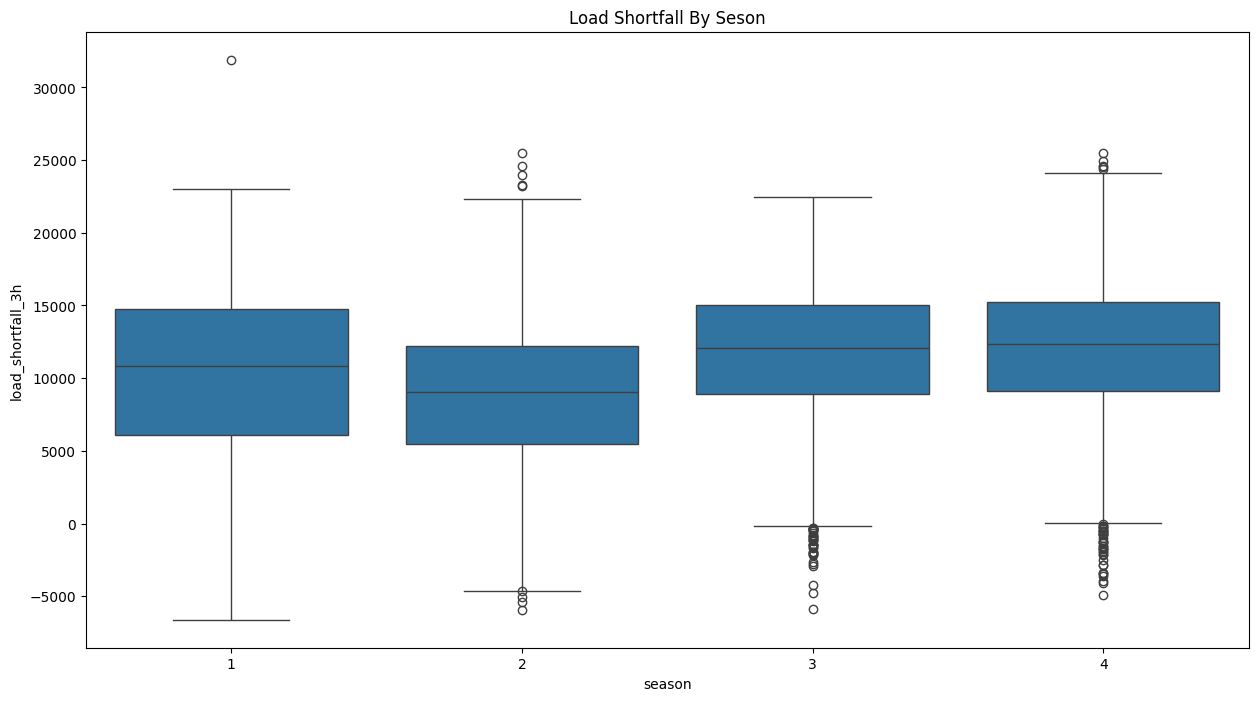

In [1145]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_time_y, x="season", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Seson')
plt.show()

Upon examining the boxplot, distinct patterns emerge in the distribution of `load_shortfall_3h` across different seasons. Notably, the winter months (1) exhibit a higher variability in load shortfalls, accompanied by an overall higher maximum value. In contrast, while summer (4) and autumn (3) share a comparable maximum, the distribution during these seasons appears less spread out, indicating a more concentrated range of load shortfalls. This observation underscores the impact of seasonal variations, highlighting the unique energy consumption dynamics during winter months and the relatively stabilized patterns in summer and autumn. 

Extending our analysis to examine the relationship between 'load_shortfall_3h' and 'year' provides a broader perspective on the dataset. By conducting similar analyses per year, we aim to uncover potential trends, fluctuations, or patterns in energy load shortfalls over different years. 

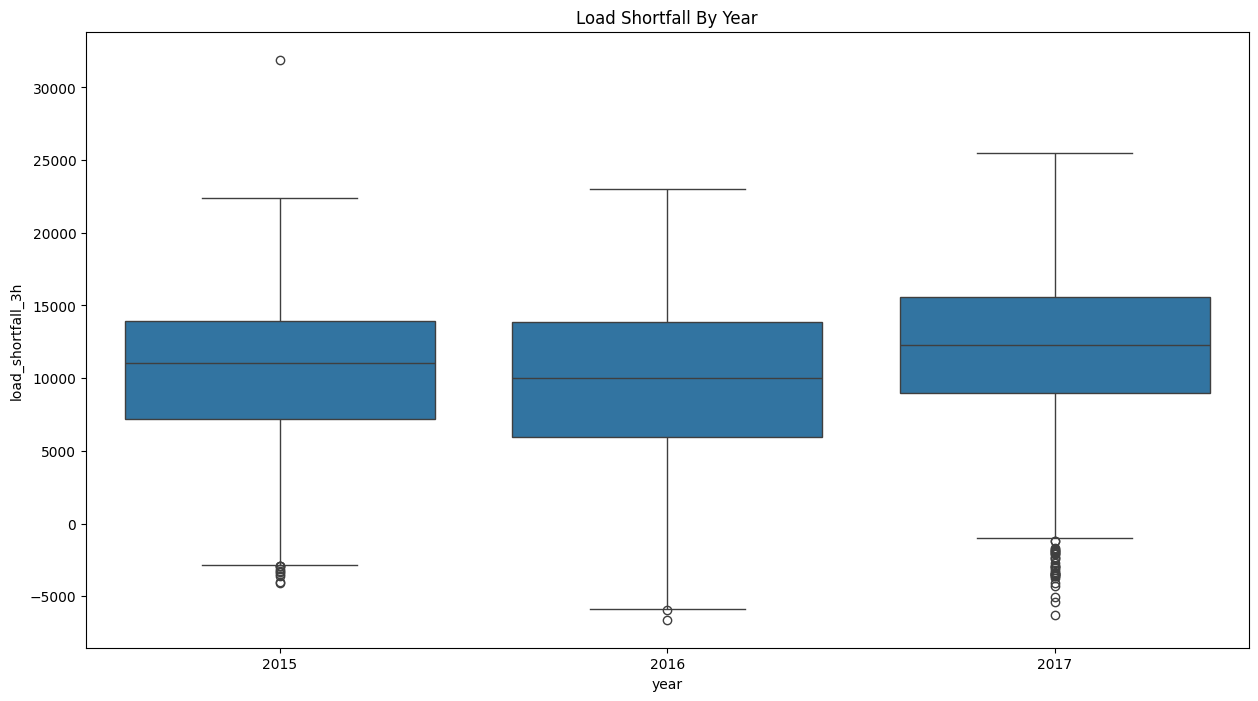

In [1146]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_time_y, x="year", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Year')
plt.show()

Distinct patterns emerge when analyzing `load_shortfall_3h` across different years. Specifically, in the year 2015, there is minimal variation in the data, indicating a relatively stable trend in energy load shortfalls. In 2016, the variation increases, signifying a broader range of load shortfalls compared to the previous year. Notably, 2017 exhibits a higher maximum value, suggesting more significant load shortfalls, albeit with less overall variation in the data. These observations underscore the evolving energy consumption dynamics over the years, highlighting fluctuations and potential shifts in the underlying patterns.

Let's compare the `load_shortfall_3h` with the `houroftheday`.  By exploring this relationship, we aim to identify specific hours during which load shortfalls are more prevalent or exhibit distinct patterns.

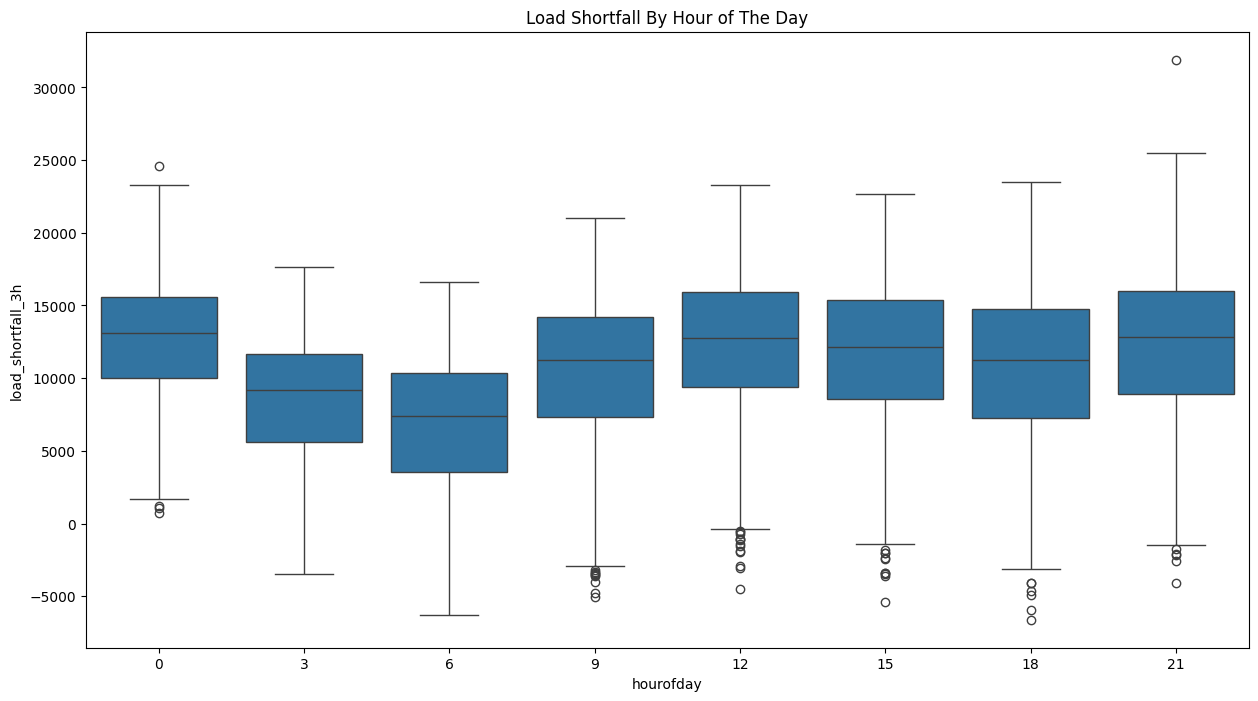

In [1147]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_time_y, x="hourofday", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Hour of The Day')
plt.show()

Upon thorough analysis, it becomes evident that the occurrences of load shortfalls are most pronounced during the hours 0, 12, and 21. Conversely, the incidence of load shortfalls is comparatively lower during the hours 6 and 3. This discernment of hourly patterns provides crucial insights into the fluctuating demand dynamics, aiding in the identification of peak and off-peak periods.

Finally, lets consider the impact that the day of the week has on the production of renewable energy:

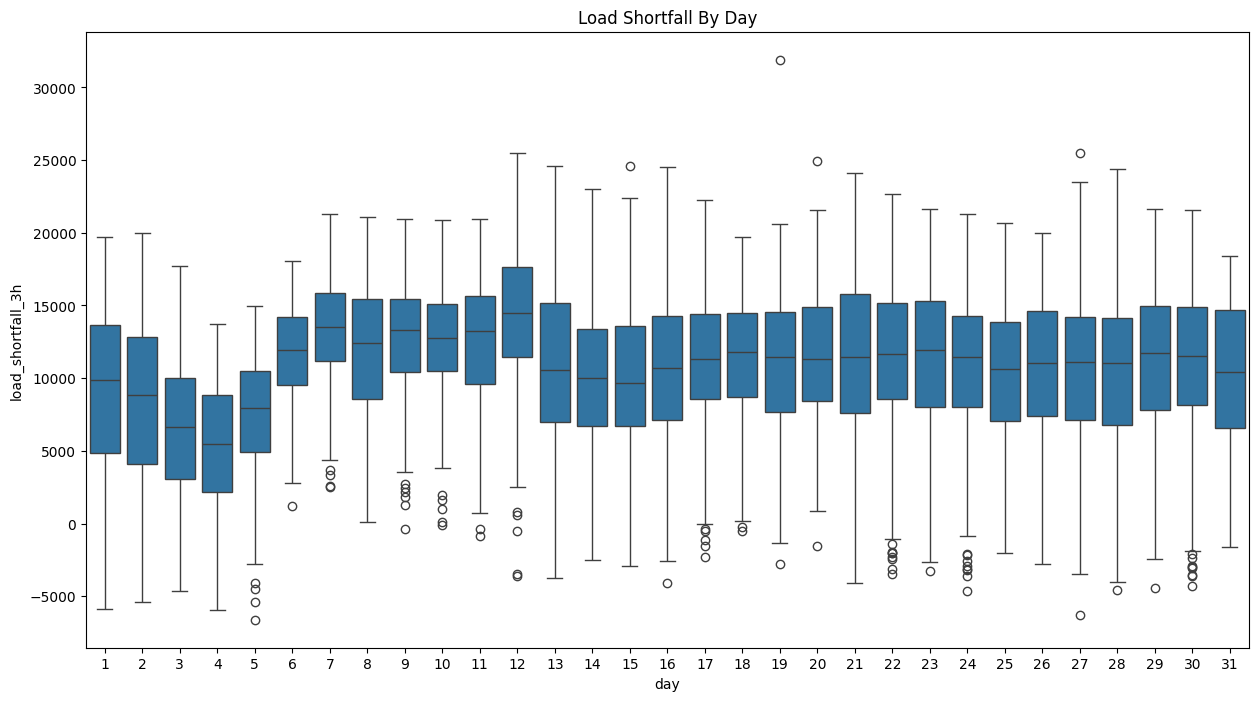

In [1148]:
# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot target variable as a function of weekday
sns.boxplot(data=df_time_y,
            x="day",
            y="load_shortfall_3h"
           )

# Set title, set x axis to corresponding day of the week and display image
ax.set_title('Load Shortfall By Day')
plt.show()

It is evident that the production of renewable energy maintains a stable trend throughout the month. However, a notable decline is observed during days 3 to 5. This decline highlights a specific period of reduced renewable energy generation, potentially influenced by external factors or operational considerations.

##### 5.1.2. df_Barcelona:

Subsequently, we will conduct a comprehensive examination of all the data related to Barcelona. This detailed scrutiny will encompass various features specific to this city, providing a nuanced understanding of the dataset's Barcelona-centric attributes. By immersing ourselves in this focused exploration, we aim to uncover city-specific patterns and trends, thus enriching our overall insights into the dataset.

In [1149]:
df_Barcelona = df_clean[['Barcelona_weather_id' , 'Barcelona_wind_speed', 'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 
           'Barcelona_temp_max' , 'Barcelona_rain_1h', 'Barcelona_rain_3h' , 'Barcelona_pressure']]

 We will commence our exploration by examining the initial entries of the `df_Barcelona` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1150]:
df_Barcelona.head(2)

Barcelona_weather_id  Barcelona_wind_speed  Barcelona_wind_deg  \
0                 800.0              6.333333           42.666667   
1                 800.0              4.000000          139.000000   

   Barcelona_temp  Barcelona_temp_min  Barcelona_temp_max  Barcelona_rain_1h  \
0      281.013000          281.013000          281.013000                0.0   
1      280.561667          280.561667          280.561667                0.0   

   Barcelona_rain_3h  Barcelona_pressure  
0                0.0         1036.333333  
1                0.0         1037.333333

Next, let's look at some descriptive statistics for the rest of our variables:

In [1151]:
df_Barcelona.describe()

Barcelona_weather_id  Barcelona_wind_speed  Barcelona_wind_deg  \
count           8763.000000           8763.000000         8763.000000   
mean             765.979687              2.870497          190.544848   
std               88.142235              1.792197           89.077337   
min              200.666667              0.000000            0.000000   
25%              800.000000              1.666667          118.166667   
50%              800.333333              2.666667          200.000000   
75%              801.000000              4.000000          260.000000   
max              804.000000             12.666667          360.000000   

       Barcelona_temp  Barcelona_temp_min  Barcelona_temp_max  \
count     8763.000000         8763.000000         8763.000000   
mean       289.855459          288.447422          291.157644   
std          6.528111            6.102593            7.273538   
min        270.816667          269.483333          272.150000   
25%        284.973443          284.150000          285.483333   
50%        289.416667          288.150000          290.150000   
75%        294.909000          292.966667          296.855000   
max        307.316667          304.816667          314.076667   

       Barcelona_rain_1h  Barcelona_rain_3h  Barcelona_pressure  
count        8763.000000        8763.000000        8.763000e+03  
mean            0.128906           0.000439        1.377965e+03  
std             0.634730           0.003994        1.407314e+04  
min             0.000000           0.000000        6.706667e+02  
25%             0.000000           0.000000        1.014000e+03  
50%             0.000000           0.000000        1.018000e+03  
75%             0.000000           0.000000        1.022000e+03  
max            12.000000           0.093000        1.001411e+06

To quantify the skewness of the data in the Valencia dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Valencia context.

In [1152]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Barcelona.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                               0
Barcelona_wind_speed   1.057331
Barcelona_rain_1h      8.726988
Barcelona_rain_3h     12.696605
Barcelona_pressure    57.979664 
 

High left skew:                              0
Barcelona_weather_id -2.584011 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                            0
Barcelona_wind_deg -0.180001
Barcelona_temp      0.128095
Barcelona_temp_min -0.018057
Barcelona_temp_max  0.276925 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

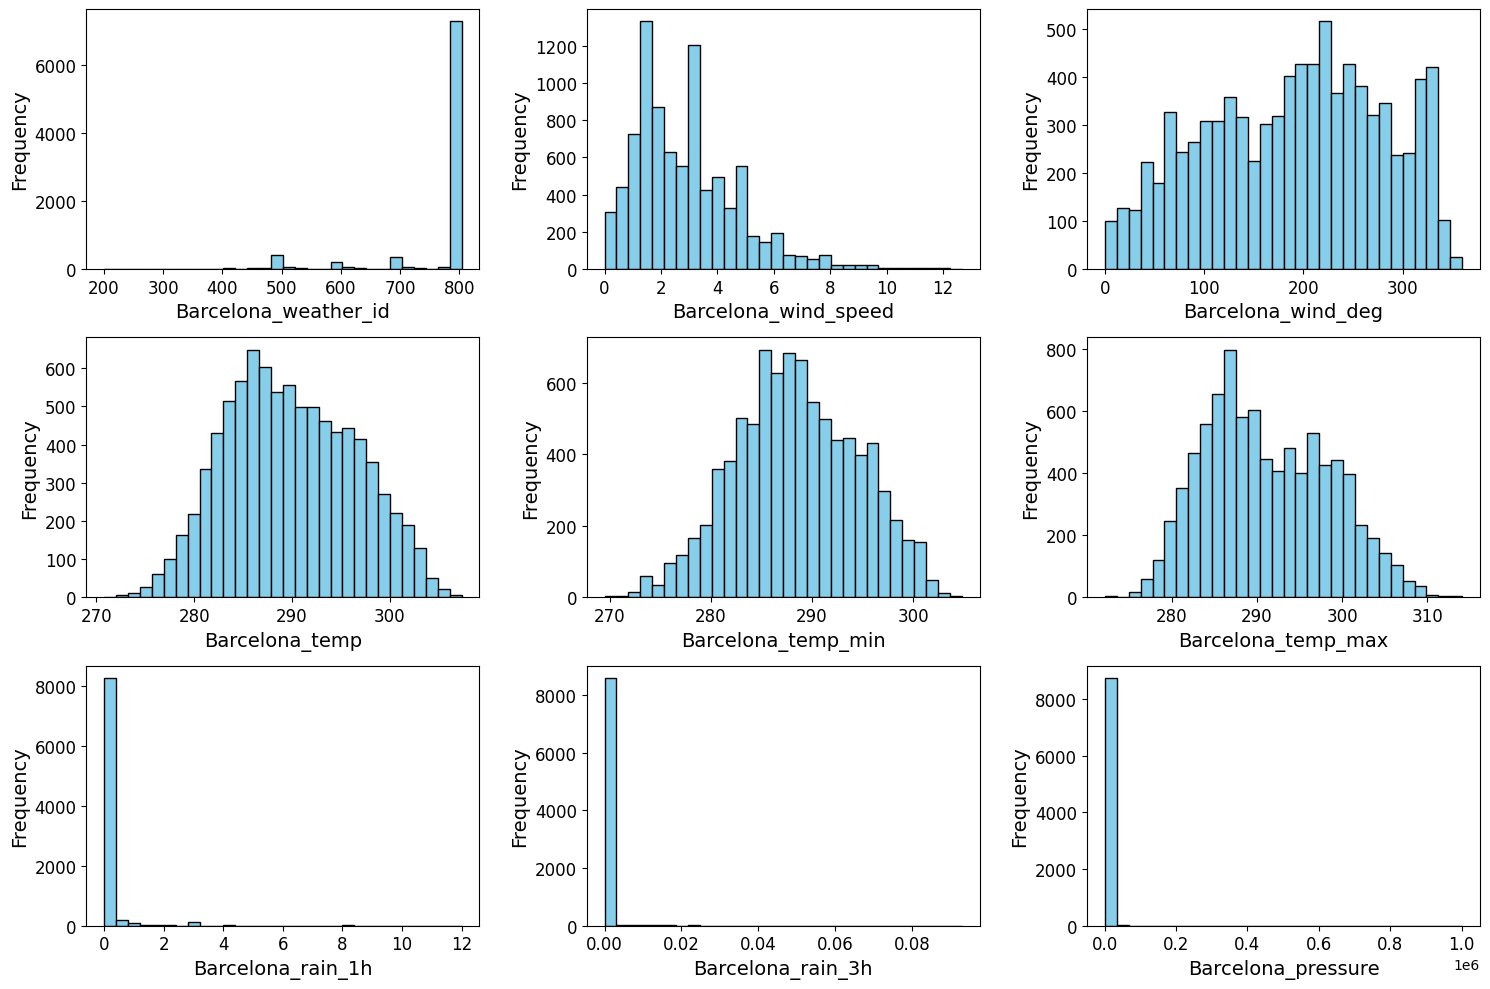

In [1153]:
# Define the number of rows and columns for subplots
number_of_rows = 3  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Barcelona.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Barcelona[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In our examination of Barcelona's weather data, specific skewness patterns have emerged within various weather variables.

**Highly Right Skew:**
Four variables, including wind speed, rainfall for 1 hour, rainfall for 3 hours, and atmospheric pressure, display a significant rightward or positive skew. This indicates a prevalence of higher values in these categories. Barcelona experiences occasional strong winds, heavy short-term and prolonged rainfall, as well as higher atmospheric pressure values, contributing to these skewed patterns.

**High Left Skew:**
`Barcelona_weather_id` demonstrates a significant leftward or negative skew. This suggests frequent occurrences of specific weather conditions, represented by lower weather IDs. Barcelona tends to experience certain consistent weather states, contributing to this skewed pattern.

**Relatively Symmetrical:**
Several variables, including wind degree and temperature-related metrics, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as wind direction and temperature levels, are fairly evenly spread around their average values, indicating a balanced climate in these aspects in Barcelona.

These skewness patterns offer qualitative insights into Barcelona's weather characteristics, vital for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Barcelona's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1154]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Barcelona.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                                 0
Barcelona_weather_id     5.701882
Barcelona_rain_1h      101.578931
Barcelona_rain_3h      187.800460
Barcelona_pressure    3687.564230 
 

Low kurtosis (Small amount of outliers):                              0
Barcelona_wind_speed  1.493635
Barcelona_wind_deg   -0.959160
Barcelona_temp       -0.696555
Barcelona_temp_min   -0.474890
Barcelona_temp_max   -0.728757 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables such as `Barcelona_weather_id`, `Barcelona_rain_1h`, `Barcelona_rain_3h`, and `Barcelona_pressure` exhibit high kurtosis, indicating a substantial number of outliers in these data sets. `Barcelona_rain_1h` and `Barcelona_rain_3h` indicate instances of heavy rainfall, with the former potentially signifying intense short-term rainfall events. `Barcelona_pressure` displays extreme outlier values, suggesting irregular atmospheric pressure readings. 

**Low Kurtosis (Small Amount of Outliers):**
Variables like `Barcelona_wind_speed`, `Barcelona_wind_deg`, `Barcelona_temp`, `Barcelona_temp_min`, and `Barcelona_temp_max` demonstrate low kurtosis, indicating a distribution where most values cluster close to the mean. These variables have few outliers, suggesting a stable and predictable range of values. For example, `Barcelona_temp` reflects a consistent temperature range in Barcelona. 

##### 5.1.3. df_Bilbao:

In the refinement of our dataset, a specific subset, denoted as `df_Bilbao`, has been meticulously curated. By isolating these key features, `df_Bilbao` encapsulates the weather-related parameters critical for our analysis and modeling endeavors. This focused approach enables a detailed examination of Bilbao's weather patterns, enriching our understanding of the city-specific climatic dynamics.

In [1155]:
df_Bilbao = df_clean[['Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure','Bilbao_clouds_all']]

 We will commence our exploration by examining the initial entries of the `df_Bilbao` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1156]:
df_Bilbao.head(2)

Bilbao_temp  Bilbao_temp_min  Bilbao_temp_max  Bilbao_rain_1h  \
0   269.338615       269.338615       269.338615             0.0   
1   270.376000       270.376000       270.376000             0.0   

   Bilbao_snow_3h  Bilbao_pressure  Bilbao_clouds_all  
0             0.0      1035.000000                0.0  
1             0.0      1035.666667                0.0

Next, let's look at some descriptive statistics for the rest of our variables:

In [1157]:
df_Bilbao.describe()

Bilbao_temp  Bilbao_temp_min  Bilbao_temp_max  Bilbao_rain_1h  \
count  8763.000000      8763.000000      8763.000000     8763.000000   
mean    286.422929       285.017973       287.966027        0.135753   
std       6.818682         6.705672         7.105590        0.374901   
min     267.483333       264.483333       269.063000        0.000000   
25%     281.374167       280.085167       282.836776        0.000000   
50%     286.158333       284.816667       287.630000        0.000000   
75%     291.034167       289.816667       292.483333        0.100000   
max     310.710000       309.816667       317.966667        3.000000   

       Bilbao_snow_3h  Bilbao_pressure  Bilbao_clouds_all  
count     8763.000000      8763.000000        8763.000000  
mean         0.031912      1017.739549          43.469132  
std          0.557264        10.046124          32.551044  
min          0.000000       971.333333           0.000000  
25%          0.000000      1013.000000          10.000000  
50%          0.000000      1019.000000          45.000000  
75%          0.000000      1024.000000          75.000000  
max         21.300000      1042.000000         100.000000

To quantify the skewness of the data in the Valencia dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Valencia context.

In [1158]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Bilbao.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                         0
Bilbao_rain_1h   5.222802
Bilbao_snow_3h  26.177568 
 

High left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew:                         0
Bilbao_pressure -0.999642 
 

Relatively Symmetrical:                           0
Bilbao_temp        0.293686
Bilbao_temp_min    0.194912
Bilbao_temp_max    0.393932
Bilbao_clouds_all -0.053085 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

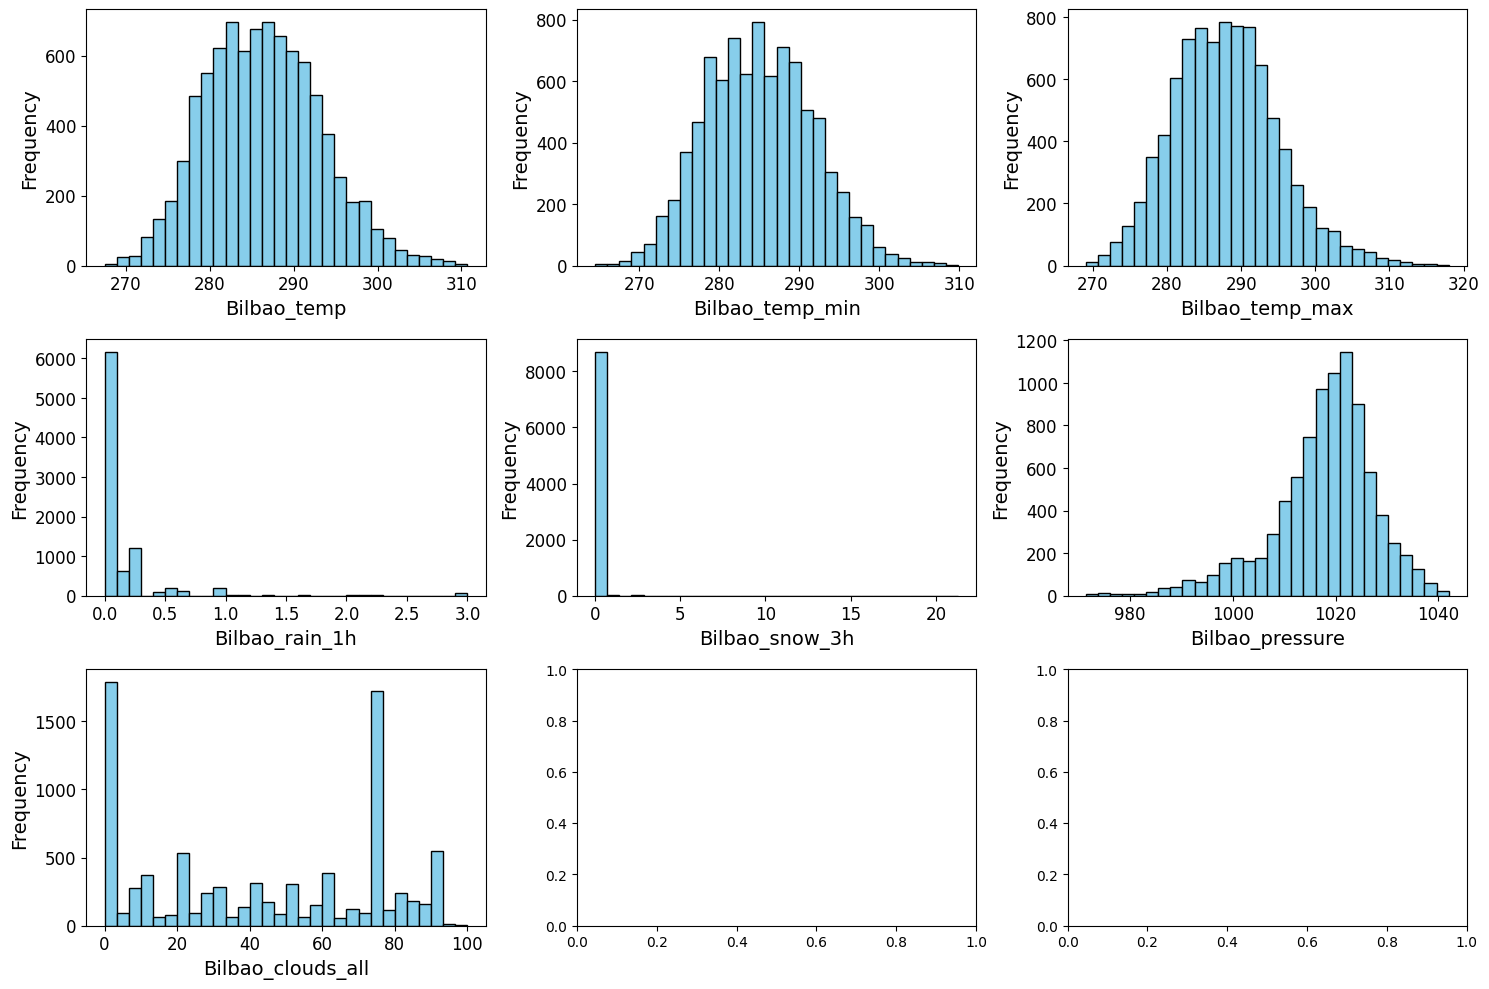

In [1159]:
# Define the number of rows and columns for subplots
number_of_rows = 3  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Bilbao.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Bilbao[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In our analysis of Bilbao's weather data, we've identified distinct skewness patterns within various weather variables.

**Highly Right Skew:**
Two variables, rain for 1 hour and snowfall for 3 hours, exhibit a significant rightward or positive skew. This suggests a prevalence of higher values in these categories. Bilbao experiences occasional heavy short-term rainfall and rare instances of significant snowfall, contributing to these skewed patterns.

**Relatively Symmetrical:**
Several variables, including temperature, temperature minimum and maximum, and cloud coverage, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as temperature levels and cloud coverage, are fairly evenly spread around their average values, indicating a balanced climate in these aspects in Bilbao.

These skewness patterns provide qualitative insights into Bilbao's weather characteristics, essential for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Bilbao's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1160]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Bilbao.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                          0
Bilbao_rain_1h   32.904656
Bilbao_snow_3h  806.128471 
 

Low kurtosis (Small amount of outliers):                           0
Bilbao_temp       -0.086363
Bilbao_temp_min   -0.230342
Bilbao_temp_max    0.283366
Bilbao_pressure    1.825323
Bilbao_clouds_all -1.533417 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Bilbao_rain_1h` and `Bilbao_snow_3h` display high kurtosis, indicating a significant number of outliers. These variables contain extreme values that deviate significantly from the typical range. For instance, `Bilbao_snow_3h` exhibits high kurtosis, suggesting infrequent but intense snowfall events in Bilbao. 

**Low Kurtosis (Small Amount of Outliers):**
Variables such as `Bilbao_temp`, `Bilbao_temp_min`, `Bilbao_temp_max`, `Bilbao_pressure`, and `Bilbao_clouds_all` demonstrate low kurtosis, indicating a distribution where most values cluster around the mean. These variables have fewer outliers, signifying a more stable and typical range of values. For example, `Bilbao_temp` shows low kurtosis, indicating that temperatures in Bilbao generally fall within a predictable range. 

##### 5.1.4. df_Madrid:

In the upcoming section dedicated to the analysis of Madrid city, a focused dataset, named `df_Madrid`, has been meticulously crafted, encompassing exclusively the variables pertinent to Madrid. 

In [1161]:
df_Madrid = df_clean[['Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' , 'Madrid_rain_1h' , 
           'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity']]

 We will commence our exploration by examining the initial entries of the `df_Madrid` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1162]:
df_Madrid.head(2)

Madrid_weather_id  Madrid_wind_speed  Madrid_temp  Madrid_temp_min  \
0              800.0           0.666667   265.938000       265.938000   
1              800.0           0.333333   266.386667       266.386667   

   Madrid_temp_max  Madrid_rain_1h  Madrid_pressure  Madrid_clouds_all  \
0       265.938000             0.0       971.333333                0.0   
1       266.386667             0.0       972.666667                0.0   

   Madrid_humidity  
0        64.000000  
1        64.666667

Next, let's look at some descriptive statistics for the rest of our variables:

In [1163]:
df_Madrid.describe()

Madrid_weather_id  Madrid_wind_speed  Madrid_temp  Madrid_temp_min  \
count        8763.000000        8763.000000  8763.000000      8763.000000   
mean          773.527594           2.425729   288.419439       287.202203   
std            77.313315           1.850371     9.346796         9.206237   
min           211.000000           0.000000   264.983333       264.983333   
25%           800.000000           1.000000   281.404281       280.299167   
50%           800.000000           2.000000   287.053333       286.083333   
75%           800.666667           3.333333   295.154667       293.884500   
max           804.000000          13.000000   313.133333       310.383333   

       Madrid_temp_max  Madrid_rain_1h  Madrid_pressure  Madrid_clouds_all  \
count      8763.000000     8763.000000      8763.000000        8763.000000   
mean        289.540309        0.037818      1010.316920          19.473392   
std           9.752047        0.152639        22.198555          28.053660   
min         264.983333        0.000000       927.666667           0.000000   
25%         282.150000        0.000000      1012.333333           0.000000   
50%         288.116177        0.000000      1017.333333           0.000000   
75%         296.816667        0.000000      1022.000000          33.333333   
max         314.483333        3.000000      1038.000000         100.000000   

       Madrid_humidity  
count      8763.000000  
mean         57.414717  
std          24.335396  
min           6.333333  
25%          36.333333  
50%          58.000000  
75%          78.666667  
max         100.000000

To quantify the skewness of the data in the Valencia dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Valencia context.

In [1164]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Madrid.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                           0
Madrid_wind_speed  1.441144
Madrid_rain_1h     7.074308
Madrid_clouds_all  1.246745 
 

High left skew:                           0
Madrid_weather_id -3.107722
Madrid_pressure   -1.850768 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                         0
Madrid_temp      0.304123
Madrid_temp_min  0.275083
Madrid_temp_max  0.298707
Madrid_humidity -0.057378 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

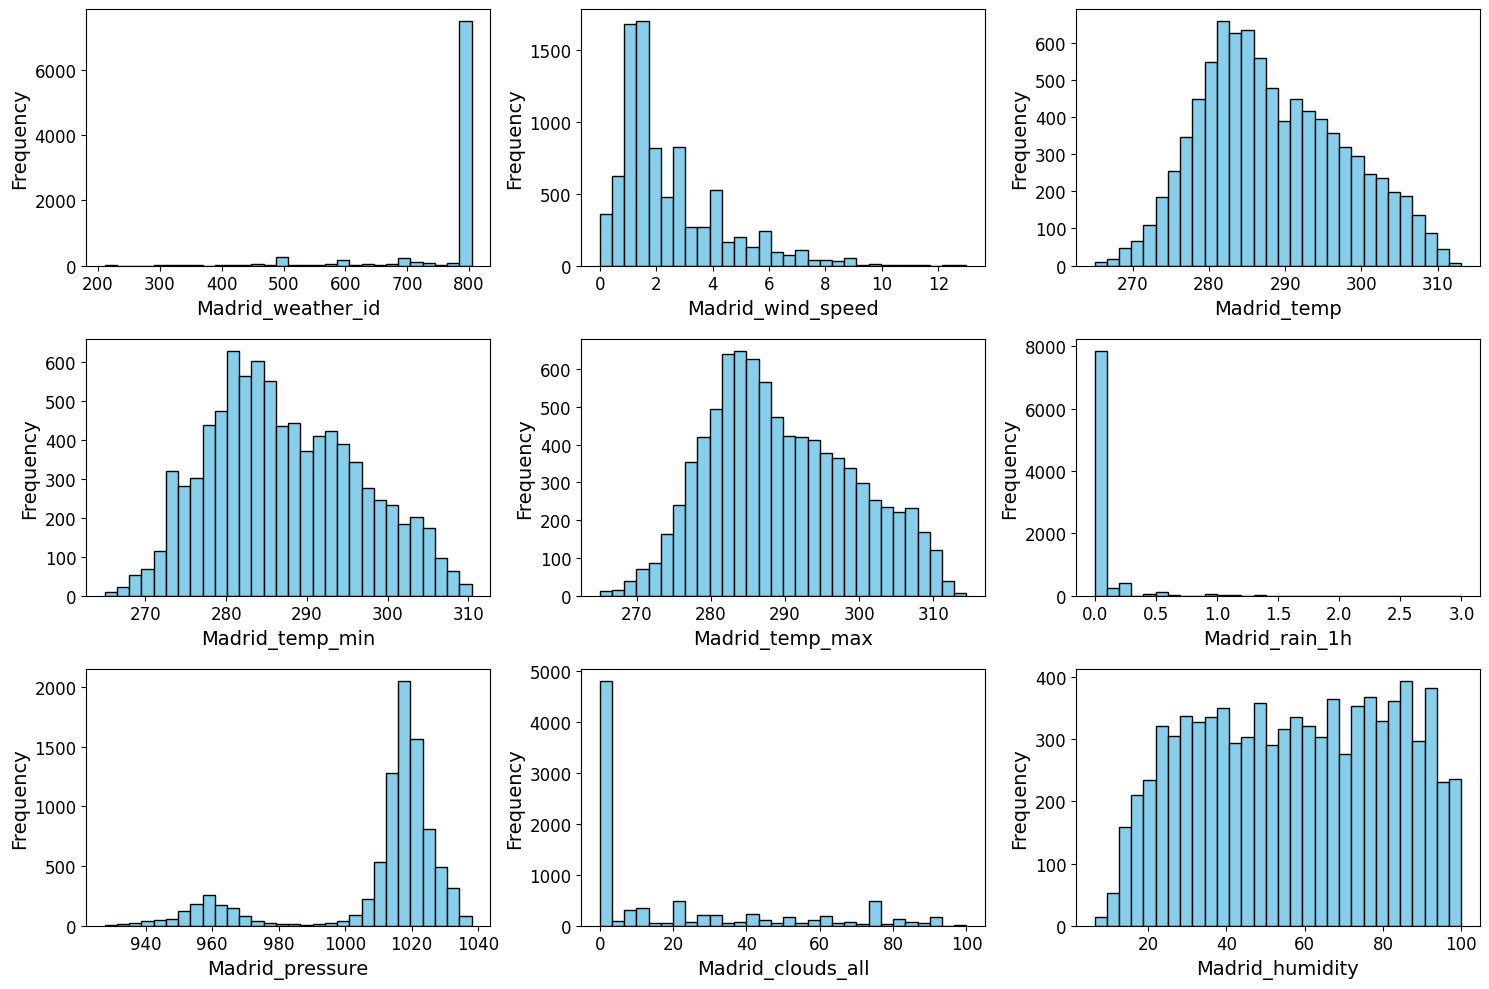

In [1165]:
# Define the number of rows and columns for subplots
number_of_rows = 3  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Madrid.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Madrid[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In the context of our analysis of Madrid's weather data, we've observed distinct skewness patterns, providing valuable insights into the distributional characteristics of various weather variables.

**Highly Right Skew:**
Certain variables, like wind speed, rainfall, and cloud coverage, exhibit a significant rightward or positive skew. This indicates a prevalence of higher values in these categories, suggesting occasional strong winds, heavy rainfall, and cloudier weather in Madrid.

**High Left Skew:**
Other variables, such as weather ID and atmospheric pressure, display a significant leftward or negative skew. This suggests frequent occurrences of specific weather conditions, represented by lower weather IDs, and lower atmospheric pressure values.

**Relatively Symmetrical:**
Certain variables, including temperature and humidity, showcase a symmetrical distribution around their means. This means that these aspects of weather, such as temperature levels and humidity, are fairly evenly spread around their average values.

These skewness patterns, even without specific numerical values, offer a qualitative understanding of how various weather factors are distributed in Madrid. This understanding is instrumental in our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Madrid's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1166]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Madrid.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                            0
Madrid_weather_id   9.259047
Madrid_rain_1h     76.584491 
 

Low kurtosis (Small amount of outliers):                           0
Madrid_wind_speed  2.036462
Madrid_temp       -0.612299
Madrid_temp_min   -0.666646
Madrid_temp_max   -0.662861
Madrid_pressure    2.216199
Madrid_clouds_all  0.142079
Madrid_humidity   -1.167537 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Madrid_weather_id` and `Madrid_rain_1h` exhibit high kurtosis, indicating a substantial number of outliers. These variables contain extreme values that deviate significantly from the typical range. For instance, `Madrid_rain_1h` has a high kurtosis, suggesting infrequent but intense rainfall events in Madrid. 

**Low Kurtosis (Small Amount of Outliers):**
Variables such as `Madrid_wind_speed`, `Madrid_temp`, `Madrid_temp_min`, `Madrid_temp_max`, `Madrid_pressure`, `Madrid_clouds_all`, and `Madrid_humidity` demonstrate low kurtosis, indicating a distribution where most values cluster around the mean. These variables have fewer outliers, signifying a more stable and typical range of values. For example, Madrid_wind_speed exhibits low kurtosis, indicating that wind speeds in Madrid generally fall within a predictable range. 

##### 5.1.5. df_Seville

In the next section dedicated to the analysis of Seville city, a focused dataset, named `df_Seville`, has been meticulously crafted, encompassing exclusively the variables pertinent to Seville. 

In [1167]:
df_Seville = df_clean[['Seville_weather_id' , 'Seville_wind_speed' , 'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 
           'Seville_rain_3h' , 'Seville_pressure' , 'Seville_clouds_all' , 'Seville_humidity']]

 We will commence our exploration by examining the initial entries of the `df_Seville` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1168]:
df_Seville.head(2)

Seville_weather_id  Seville_wind_speed  Seville_temp  Seville_temp_min  \
0               800.0            3.333333    274.254667        274.254667   
1               800.0            3.333333    274.945000        274.945000   

   Seville_temp_max  Seville_rain_1h  Seville_rain_3h  Seville_pressure  \
0        274.254667              0.0              0.0                25   
1        274.945000              0.0              0.0                25   

   Seville_clouds_all  Seville_humidity  
0                 0.0         74.333333  
1                 0.0         78.333333

Next, let's look at some descriptive statistics for the rest of our variables:

In [1169]:
df_Seville.describe()

Seville_weather_id  Seville_wind_speed  Seville_temp  Seville_temp_min  \
count         8763.000000         8763.000000   8763.000000       8763.000000   
mean           774.658818            2.425045    293.978903        291.633356   
std             71.940009            1.672895      7.920986          8.178220   
min            200.000000            0.000000    272.063000        270.150000   
25%            800.000000            1.000000    288.282917        285.816667   
50%            800.000000            2.000000    293.323333        290.816667   
75%            800.000000            3.333333    299.620333        297.150000   
max            804.000000           11.666667    314.976667        314.816667   

       Seville_temp_max  Seville_rain_1h  Seville_rain_3h  Seville_pressure  \
count       8763.000000      8763.000000      8763.000000       8763.000000   
mean         297.479527         0.039439         0.000243         13.507246   
std            8.875812         0.175857         0.003660          7.237267   
min          272.063000         0.000000         0.000000          1.000000   
25%          291.312750         0.000000         0.000000          7.000000   
50%          297.101667         0.000000         0.000000         14.000000   
75%          304.150000         0.000000         0.000000         20.000000   
max          320.483333         3.000000         0.093333         25.000000   

       Seville_clouds_all  Seville_humidity  
count         8763.000000       8763.000000  
mean            13.714748         62.658793  
std             24.272482         22.621226  
min              0.000000          8.333333  
25%              0.000000         44.333333  
50%              0.000000         65.666667  
75%             20.000000         82.000000  
max             97.333333        100.000000

To quantify the skewness of the data in the Valencia dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Valencia context.

In [1170]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Seville.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                             0
Seville_wind_speed   1.151006
Seville_rain_1h      8.067341
Seville_rain_3h     19.342574
Seville_clouds_all   1.814452 
 

High left skew:                            0
Seville_weather_id -3.275574 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                          0
Seville_temp      0.157238
Seville_temp_min  0.265482
Seville_temp_max -0.033931
Seville_pressure -0.086022
Seville_humidity -0.310175 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

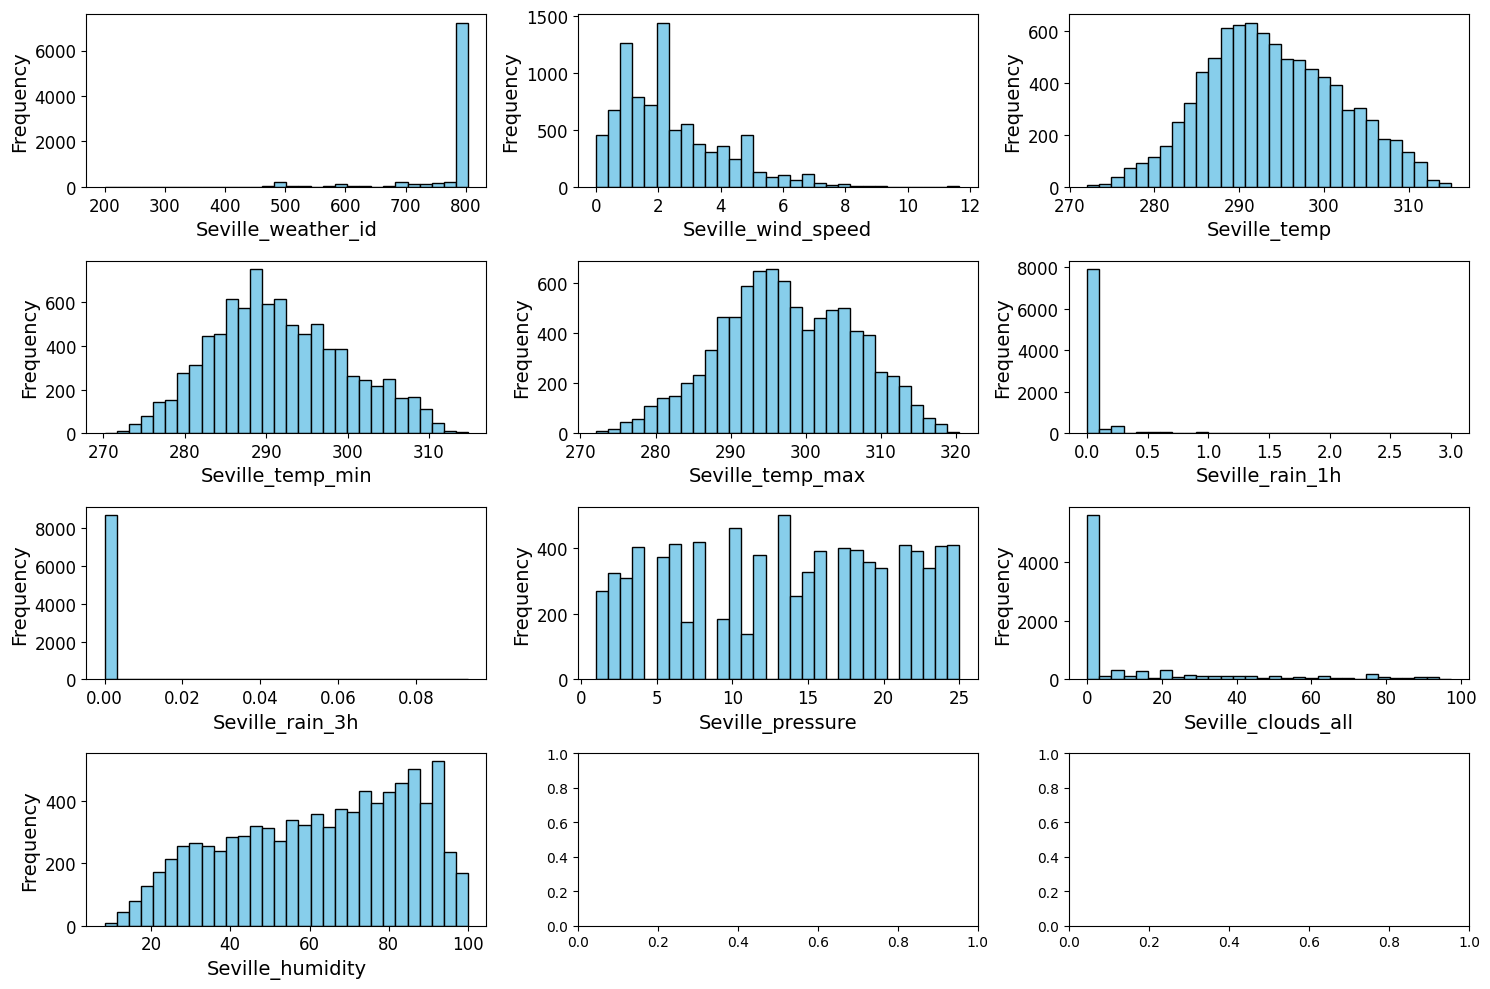

In [1171]:
# Define the number of rows and columns for subplots
number_of_rows = 4  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Seville.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Seville[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In the examination of Seville's weather data, we've identified distinct skewness patterns within various weather variables.

**Highly Right Skew:**
Certain variables, like wind speed, rainfall for 1 and 3 hours, and cloud coverage, exhibit a significant rightward or positive skew. This implies a prevalence of higher values in these categories. Seville experiences occasional strong winds, heavy short-term and prolonged rainfall, as well as cloudier weather, which aligns with these skewed patterns.

**High Left Skew:**
Other variables such as `Seville_weather_id`, displays a significant leftward or negative skew. This suggests frequent occurrences of specific weather conditions, denoted by lower weather IDs. Seville tends to experience certain consistent weather states, which contribute to this skewed pattern.

**Relatively Symmetrical:**
Certain variables, including temperature, temperature minimum and maximum, pressure, and humidity, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as temperature levels and humidity, are fairly evenly spread around their average values, indicating a balanced climate in these aspects.

These skewness patterns offer qualitative insights into Seville's weather characteristics, which are essential for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Seville's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1172]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Seville.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                              0
Seville_weather_id   10.710308
Seville_rain_1h      93.840746
Seville_rain_3h     413.136592 
 

Low kurtosis (Small amount of outliers):                            0
Seville_wind_speed  1.398580
Seville_temp       -0.504132
Seville_temp_min   -0.475564
Seville_temp_max   -0.515989
Seville_pressure   -1.220040
Seville_clouds_all  2.155921
Seville_humidity   -1.017983 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Seville_weather_id`, `Seville_rain_1h`, and `Seville_rain_3h` demonstrate high kurtosis, indicating a significant number of outliers. These variables contain extreme values that deviate substantially from the typical range. For instance, `Seville_rain_3h` has a very high kurtosis, suggesting rare but impactful events where there is an exceptionally heavy rainfall over a 3-hour period. 

**Low Kurtosis (Small Amount of Outliers):**
Variables such as `Seville_wind_speed`, `Seville_temp`, `Seville_temp_min`, `Seville_temp_max`, `Seville_pressure`, `Seville_clouds_all`, and `Seville_humidity` exhibit low kurtosis, indicating a distribution where most values cluster around the mean. These variables have fewer outliers, suggesting a more stable and typical range of values. For example, Seville_wind_speed has a low kurtosis, indicating that wind speeds in Seville generally fall within a predictable range. 

##### 5.1.6. df_Valencia:

In the final section dedicated to the analysis of Valencia city, a focused dataset, named `df_Valencia`, has been meticulously crafted, encompassing exclusively the variables pertinent to Valencia. 

In [1173]:
df_Valencia = df_clean[['Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 'Valencia_temp_min' , 'Valencia_snow_3h' , 
           'Valencia_pressure', 'Valencia_humidity']]

 We will commence our exploration by examining the initial entries of the `df_Valencia` DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [1174]:
df_Valencia.head(2)

Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  Valencia_temp_max  \
0             0.666667                  5     269.888000         269.888000   
1             1.666667                 10     271.728333         271.728333   

   Valencia_temp_min  Valencia_snow_3h  Valencia_pressure  Valencia_humidity  
0         269.888000               0.0        1002.666667          75.666667  
1         271.728333               0.0        1004.333333          71.000000

Next, let's look at some descriptive statistics for the rest of our variables:

In [1175]:
df_Valencia.describe()

Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
count          8763.000000        8763.000000    8763.000000   
mean              2.586272           5.276389     290.592152   
std               2.411190           2.877642       7.162274   
min               0.000000           1.000000     269.888000   
25%               1.000000           3.000000     285.150000   
50%               1.666667           5.000000     290.176667   
75%               3.666667           8.000000     296.056667   
max              52.000000          10.000000     310.426667   

       Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
count        8763.000000        8763.000000       8763.000000   
mean          291.337233         289.867648          0.000205   
std             7.565692           6.907402          0.011866   
min           269.888000         269.888000          0.000000   
25%           285.550167         284.783333          0.000000   
50%           291.037000         289.550000          0.000000   
75%           297.248333         294.820000          0.000000   
max           314.263333         310.272000          0.791667   

       Valencia_pressure  Valencia_humidity  
count        8763.000000        8763.000000  
mean         1013.455228          65.247727  
std             8.684485          19.262322  
min           972.666667          10.333333  
25%          1012.666667          51.333333  
50%          1017.000000          67.000000  
75%          1018.000000          81.333333  
max          1021.666667         100.000000

To quantify the skewness of the data in the Valencia dataset, we will utilize the `skew()` function. This analytical tool will provide precise numerical values, allowing us to quantitatively assess the distributional characteristics of the variables in the dataset. By leveraging this method, we aim to gain a deeper understanding of the skewness patterns, essential for our meticulous analysis and modeling efforts in the Valencia context.

In [1176]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_Valencia.skew().to_frame()

# Display variables with high skewness
High_right_Skew = skew_df[(skew_df[0] >= 1)]
High_left_Skew = skew_df[(skew_df[0] <= -1)]
print("Highly right skew:", High_right_Skew, "\n \n")
print("High left skew:", High_left_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Right_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Left_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate Right skew:", Mod_Right_Skew, "\n \n")
print("Moderate Left skew:", Mod_Left_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

Highly right skew:                              0
Valencia_wind_speed   3.499637
Valencia_snow_3h     63.298084 
 

High left skew:                           0
Valencia_pressure -2.121882 
 

Moderate Right skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate Left skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                           0
Valencia_wind_deg  0.088354
Valencia_temp      0.057476
Valencia_temp_max  0.082672
Valencia_temp_min  0.081832
Valencia_humidity -0.305757 
 



Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

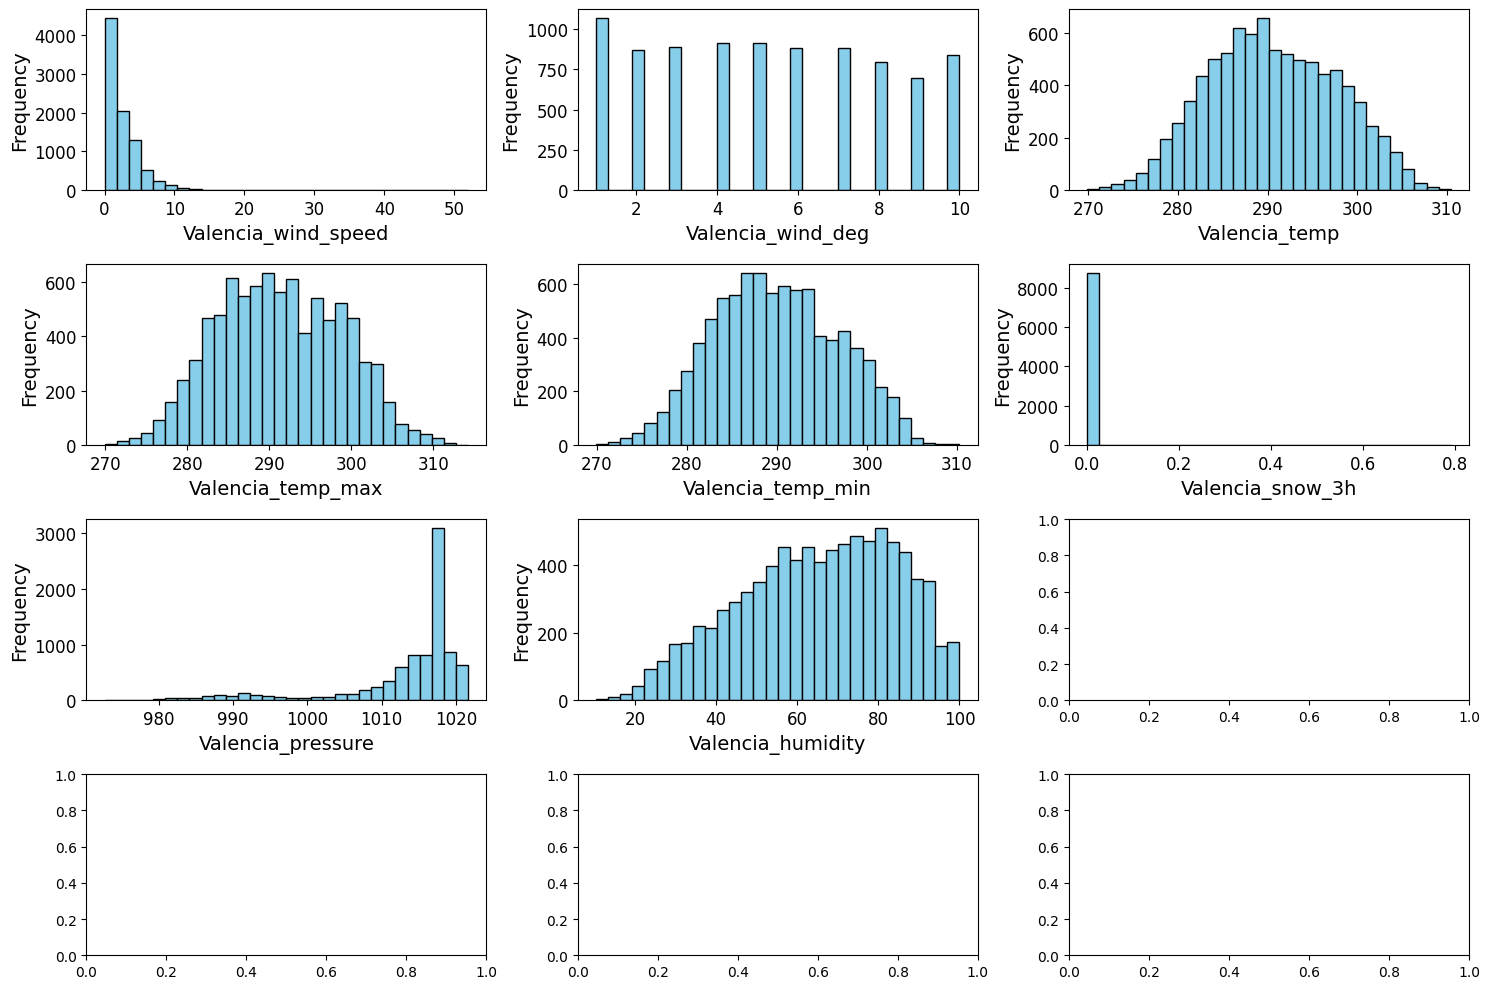

In [1177]:
# Define the number of rows and columns for subplots
number_of_rows = 4  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Valencia.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Valencia[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In our analysis of Valencia's weather data, we've identified notable skewness patterns within various weather variables.

**Highly Right Skew:**
Two variables, wind speed and snowfall for 3 hours, exhibit a significant rightward or positive skew. This suggests a prevalence of higher values in these categories. Valencia experiences occasional strong winds and rare instances of heavy snowfall, contributing to these skewed patterns.

**High Left Skew:**
Valencia_pressure displays a significant leftward or negative skew. This indicates frequent occurrences of lower pressure values in Valencia, highlighting a consistent atmospheric pressure pattern in the region.

**Relatively Symmetrical:**
Several variables, including wind degree, temperature, temperature minimum and maximum, and humidity, exhibit a more symmetrical distribution around their means. This means that these aspects of weather, such as wind direction, temperature levels, and humidity, are fairly evenly spread around their average values, indicating a balanced climate in these aspects in Valencia.

These skewness patterns provide qualitative insights into Valencia's weather characteristics, essential for our subsequent analyses and modeling efforts, guiding our predictions and interpretations related to Valencia's weather dynamics.

Finally, we will use the `kurtosis()` function to assess the shape and tail behavior of a probability distribution.

In [1178]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_Valencia.kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers):                                0
Valencia_wind_speed    35.645426
Valencia_snow_3h     4089.323165
Valencia_pressure       3.982718 
 

Low kurtosis (Small amount of outliers):                           0
Valencia_wind_deg -1.186661
Valencia_temp     -0.643793
Valencia_temp_max -0.613755
Valencia_temp_min -0.599551
Valencia_humidity -0.734345 
 



The presented findings reveal the kurtosis values for specific variables in the dataset, indicating the presence of outliers.

**High Kurtosis (Large Amount of Outliers):**
Variables like `Valencia_wind_speed`, `Valencia_snow_3h`, and `Valencia_pressure` exhibit high kurtosis, indicating a significant number of outliers. These variables contain extreme values that deviate substantially from the typical range, denoting rare but impactful events such as extreme wind speeds and unusual atmospheric pressure readings. 

**Low Kurtosis (Small Amount of Outliers):**
Variables including `Valencia_wind_deg`, `Valencia_temp`, `Valencia_temp_max`, `Valencia_temp_min`, and `Valencia_humidity` demonstrate low kurtosis, suggesting a distribution where most values cluster around the mean. These variables have fewer outliers, indicating a more stable and typical range of values. 

##### 5.1.7 Overall Data Analysis:

##### *5.1.7.1. Correlations:*

Correlation coefficient is a measure of the how variables are related to one another. It is a standardized covariance, which measures how two random variables change with respect to each other. Since Covariance is scale dependent, we use the correlation coefficient (specifically Pearson Correlation) which standardizes the covariance to a scale between -1 and 1.

* A correlation coefficient closer 1 represents a strong linear relationship in the same direction, 
* A correlation coefficient closer to -1 represents a strong linear relationship in the opposite direction,
* A correlation closer to 0 represents a weak relationship.

The formula is given by:
$$\rho=\frac{Cov(X,Y)}{\sigma(X)\sigma(Y)}$$
Where
* $Cov(X,Y)$ represents the covariance between X and Y
* $\sigma(X)$ & $\sigma(Y)$ represent the standard deviations of X & Y respectively

Let's utilize the corr() function to explore the correlations among our dataset variables. Correlation analysis enables us to discern relationships between different features, shedding light on potential dependencies within the data. This quantitative approach is fundamental in identifying patterns and guiding subsequent analytical decisions, enriching our understanding of the underlying dynamics in the dataset.

In [1179]:
df_clean.corr()

season      year     month       day  hourofday  \
season                1.000000 -0.000943  0.574388  0.002138   0.000302   
year                 -0.000943  1.000000 -0.001039 -0.001044   0.000275   
month                 0.574388 -0.001039  1.000000  0.008826   0.000301   
day                   0.002138 -0.001044  0.008826  1.000000   0.000285   
hourofday             0.000302  0.000275  0.000301  0.000285   1.000000   
Barcelona_weather_id -0.024873  0.029048  0.025352 -0.035885  -0.003444   
Barcelona_wind_speed -0.076571 -0.188756 -0.122221 -0.009699   0.182538   
Barcelona_wind_deg   -0.081097 -0.155275  0.021463 -0.039703  -0.192949   
Barcelona_temp        0.527081  0.001255  0.203184 -0.001659   0.217222   
Barcelona_temp_min    0.479905  0.053927  0.159629  0.002132   0.242716   
Barcelona_temp_max    0.543246 -0.030199  0.230539 -0.004903   0.187865   
Barcelona_rain_1h     0.039031 -0.070716 -0.029252  0.024838   0.013064   
Barcelona_rain_3h    -0.039804 -0.089857 -0.056726 -0.021814   0.003572   
Barcelona_pressure   -0.034567 -0.031373 -0.033473  0.015850  -0.009208   
Bilbao_weather_id     0.108194  0.154810  0.141738 -0.017562   0.006213   
Bilbao_wind_speed    -0.141810  0.082611 -0.086698 -0.008020   0.197848   
Bilbao_wind_deg      -0.078052 -0.104647 -0.174941  0.034253   0.110457   
Bilbao_temp           0.459051  0.002317  0.239443  0.020639   0.268754   
Bilbao_temp_min       0.450996 -0.038517  0.195889  0.016794   0.274208   
Bilbao_temp_max       0.451982  0.056996  0.277963  0.021208   0.256644   
Bilbao_rain_1h       -0.144427 -0.200747 -0.188274  0.072752   0.054527   
Bilbao_snow_3h       -0.074332 -0.069949 -0.075644 -0.055138   0.024233   
Bilbao_pressure      -0.214626 -0.026344  0.010533 -0.036101  -0.013025   
Bilbao_clouds_all    -0.037711 -0.031658 -0.117452  0.025688  -0.023714   
Madrid_weather_id     0.082069  0.026844  0.068856 -0.031751  -0.038504   
Madrid_wind_speed    -0.149807 -0.031553 -0.237445 -0.029954   0.186228   
Madrid_temp           0.467024  0.029974  0.182860  0.000861   0.290699   
Madrid_temp_min       0.426441  0.034880  0.157368  0.023009   0.270623   
Madrid_temp_max       0.472483  0.032496  0.191223 -0.007056   0.282868   
Madrid_rain_1h       -0.044203 -0.049055 -0.070592  0.025567   0.045349   
Madrid_pressure       0.094014  0.315294  0.269350 -0.033318  -0.009907   
Madrid_clouds_all    -0.217232 -0.083585 -0.118792  0.035940   0.022679   
Madrid_humidity      -0.344818 -0.084456 -0.076567  0.047372  -0.307872   
Seville_weather_id    0.097999  0.041378  0.100786  0.000676   0.020949   
Seville_wind_speed   -0.090860 -0.055772 -0.122624 -0.030206   0.251261   
Seville_temp          0.482373 -0.028691  0.213623 -0.017066   0.328541   
Seville_temp_min      0.477059 -0.031599  0.205000 -0.012197   0.358350   
Seville_temp_max      0.419200 -0.025059  0.193143 -0.020344   0.235839   
Seville_rain_1h      -0.059126 -0.054395 -0.072631  0.004315   0.016365   
Seville_rain_3h      -0.029696 -0.068058 -0.055265  0.004448   0.010921   
Seville_pressure     -0.321763 -0.126372 -0.036368 -0.008461  -0.059733   
Seville_clouds_all   -0.184436 -0.089657 -0.170345  0.010582  -0.017401   
Seville_humidity     -0.292314 -0.045730 -0.111622  0.032979  -0.424982   
Valencia_wind_speed  -0.221606 -0.012650 -0.237156 -0.000340   0.204103   
Valencia_wind_deg    -0.156524 -0.057513 -0.140195 -0.010627  -0.138415   
Valencia_temp         0.491729  0.067764  0.216464 -0.000728   0.280332   
Valencia_temp_max     0.492845  0.018818  0.210184 -0.002345   0.257827   
Valencia_temp_min     0.479553  0.119432  0.220501  0.002727   0.296154   
Valencia_snow_3h     -0.023356 -0.021228 -0.022720 -0.023046  -0.001360   
Valencia_pressure    -0.020205  0.210942  0.085883 -0.056908  -0.022716   
Valencia_humidity     0.042495 -0.033132  0.162713  0.047823  -0.351680   
load_shortfall_3h     0.176688  0.131324  0.199048  0.092116   0.139285   

                      Barcelona_weather_id  Barc

Considering the extensive nature of our dataset involving 52 variables, an intuitive approach to grasp the interrelationships is through a visual representation. A heatmap of correlation provides a clear, graphical depiction of the correlation coefficients among the variables. By employing this visualization, we can readily discern patterns of strong correlations, facilitating a more precise understanding of the intricate relationships within our data. This visual analysis enhances our ability to identify key variables and informs our subsequent analytical decisions effectively.

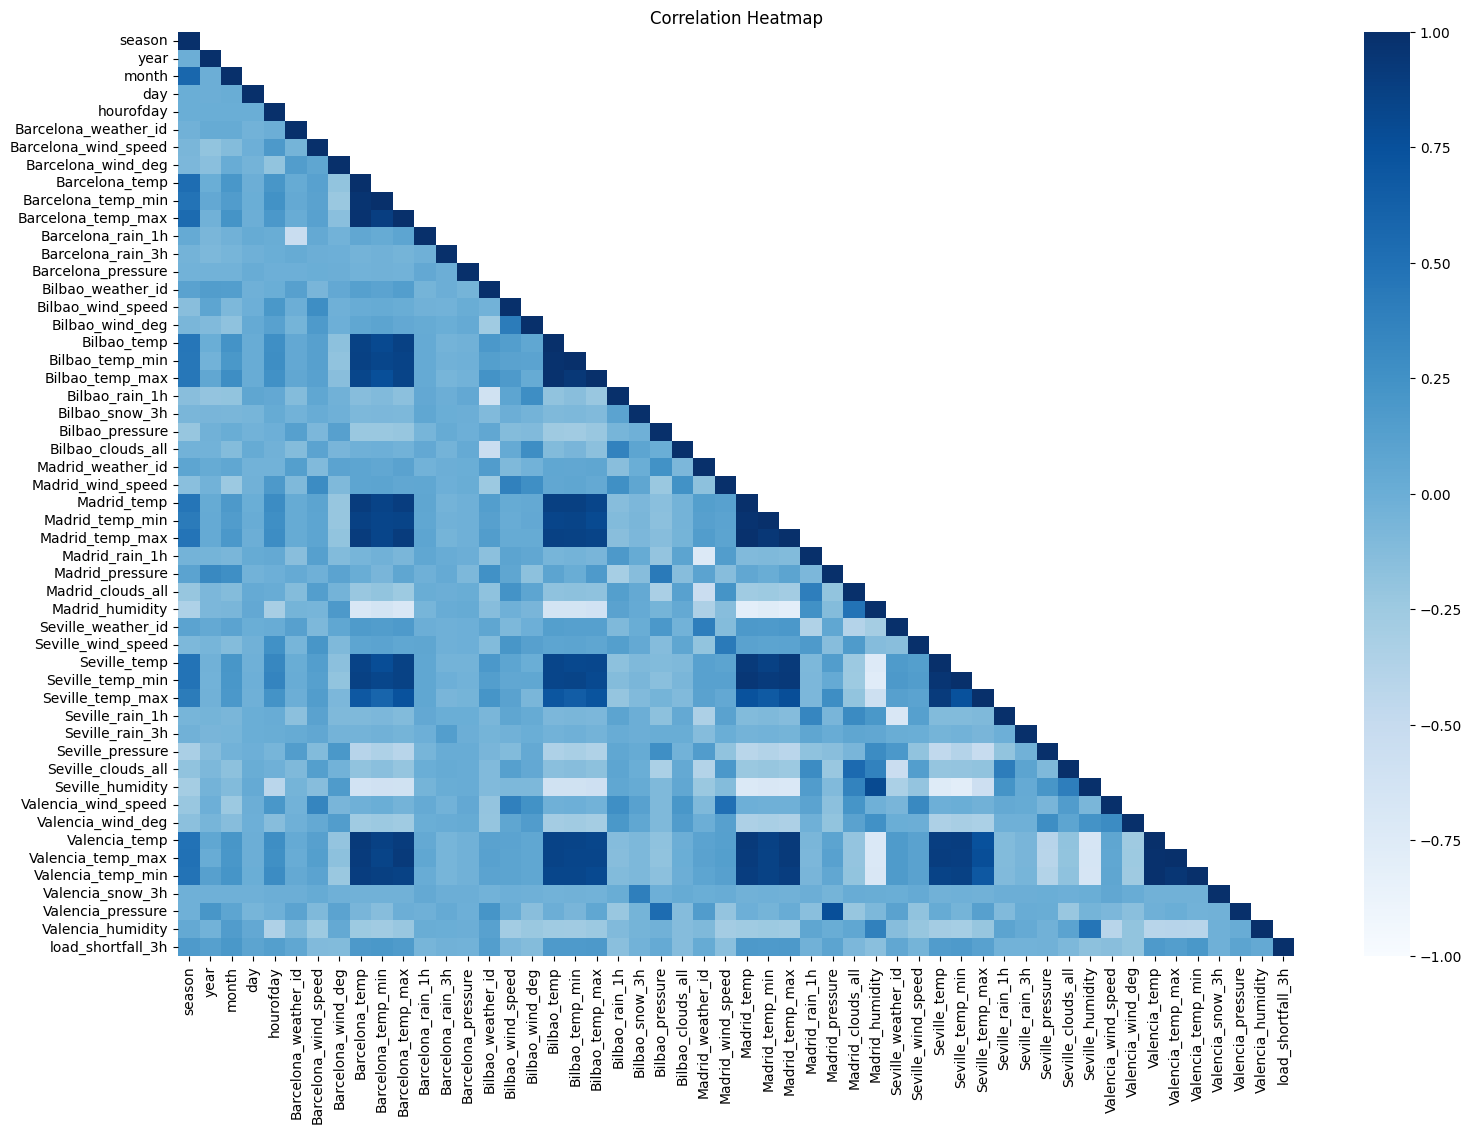

In [1180]:
# Initiate a new figure object to plot our heatmap (increased figsize)
plt.figure(figsize=(18, 12))

# We look at only the lower triangle of the array, since it is symmetric around the diagonal
mask = np.tril(df_clean.corr()) == 0

# Plotting the heatmap with blue color map
sns.heatmap(df_clean.corr(),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='Blues'  # Change the color map to blue
           )

plt.title('Correlation Heatmap');
plt.show() 

**Temperature and Seasonal Correlations:**
Unsurprisingly, the heatmap vividly illustrates a robust correlation between temperatures across diverse cities, aligning logically with the influence of seasons. As anticipated, cities experience similar temperature fluctuations based on their geographical locations and prevailing seasons.

**Pressure and Humidity Correlations:**
Additionally, noteworthy correlations emerge between atmospheric pressure and humidity levels within the cities. These relationships shed light on the intricate dynamics of weather patterns and atmospheric conditions, offering a glimpse into the interconnectedness of these variables.

**Load Shortfall and Multifaceted Correlations:**
One of the most intriguing findings pertains to the correlations involving `load_shortfall_3h`. This variable exhibits significant connections not only with temperatures but also with several temporal parameters, including year, month, day, and hour of the day. This intricate web of correlations suggests that electricity load shortfalls are influenced by a multitude of factors, spanning both meteorological and temporal dimensions.

In order to substantiate the inferences drawn from our analysis, a rigorous exploration of the dataset is imperative. One pivotal aspect is to identify the variables most intricately linked with `load_shortfall_3h`. This discernment will not only bolster our understanding but also serve as a cornerstone for the subsequent modeling endeavors. Let us now proceed to ascertain the ten most highly correlated variables with `load_shortfall_3h`, thereby elucidating the intricate relationships within the dataset.

In [1181]:
# Find the ten most correlated variables with the target variable
corr_top10_df = (
    df_clean.corr()['load_shortfall_3h']
    .apply(lambda x : abs(x))
    .sort_values(ascending=False)
    .head(11)
)

# Display predictor variables
corr_top10_df[1:11]

Valencia_temp_min     0.201863
month                 0.199048
Barcelona_temp_min    0.195984
Valencia_wind_deg     0.188674
Madrid_temp           0.186036
Barcelona_temp        0.182673
Madrid_temp_max       0.182548
Bilbao_temp_max       0.180934
season                0.176688
Bilbao_temp           0.176411
Name: load_shortfall_3h, dtype: float64

The analysis reveals compelling correlations between `load_shortfall_3h` and various environmental and temporal factors. Specifically, higher minimum temperatures in Valencia and Barcelona, along with elevated temperatures in Madrid and Bilbao, are positively associated with increased `load_shortfall_3h`. Additionally, wind direction in Valencia, maximum temperatures in Madrid and Bilbao, and specific months and seasons also exhibit positive correlations with `load_shortfall_3h`. These findings underscore the multifaceted nature of energy shortfalls, indicating that both weather-related variables and temporal patterns significantly impact the energy demand-supply dynamics in the studied regions.

Based on the aforementioned data, it is evident that even our most highly correlated predictor variable shows a relatively modest correlation with our target variable. To gain deeper insights, let's explore this further by visualizing the correlations between our variables and all other factors in the dataset.

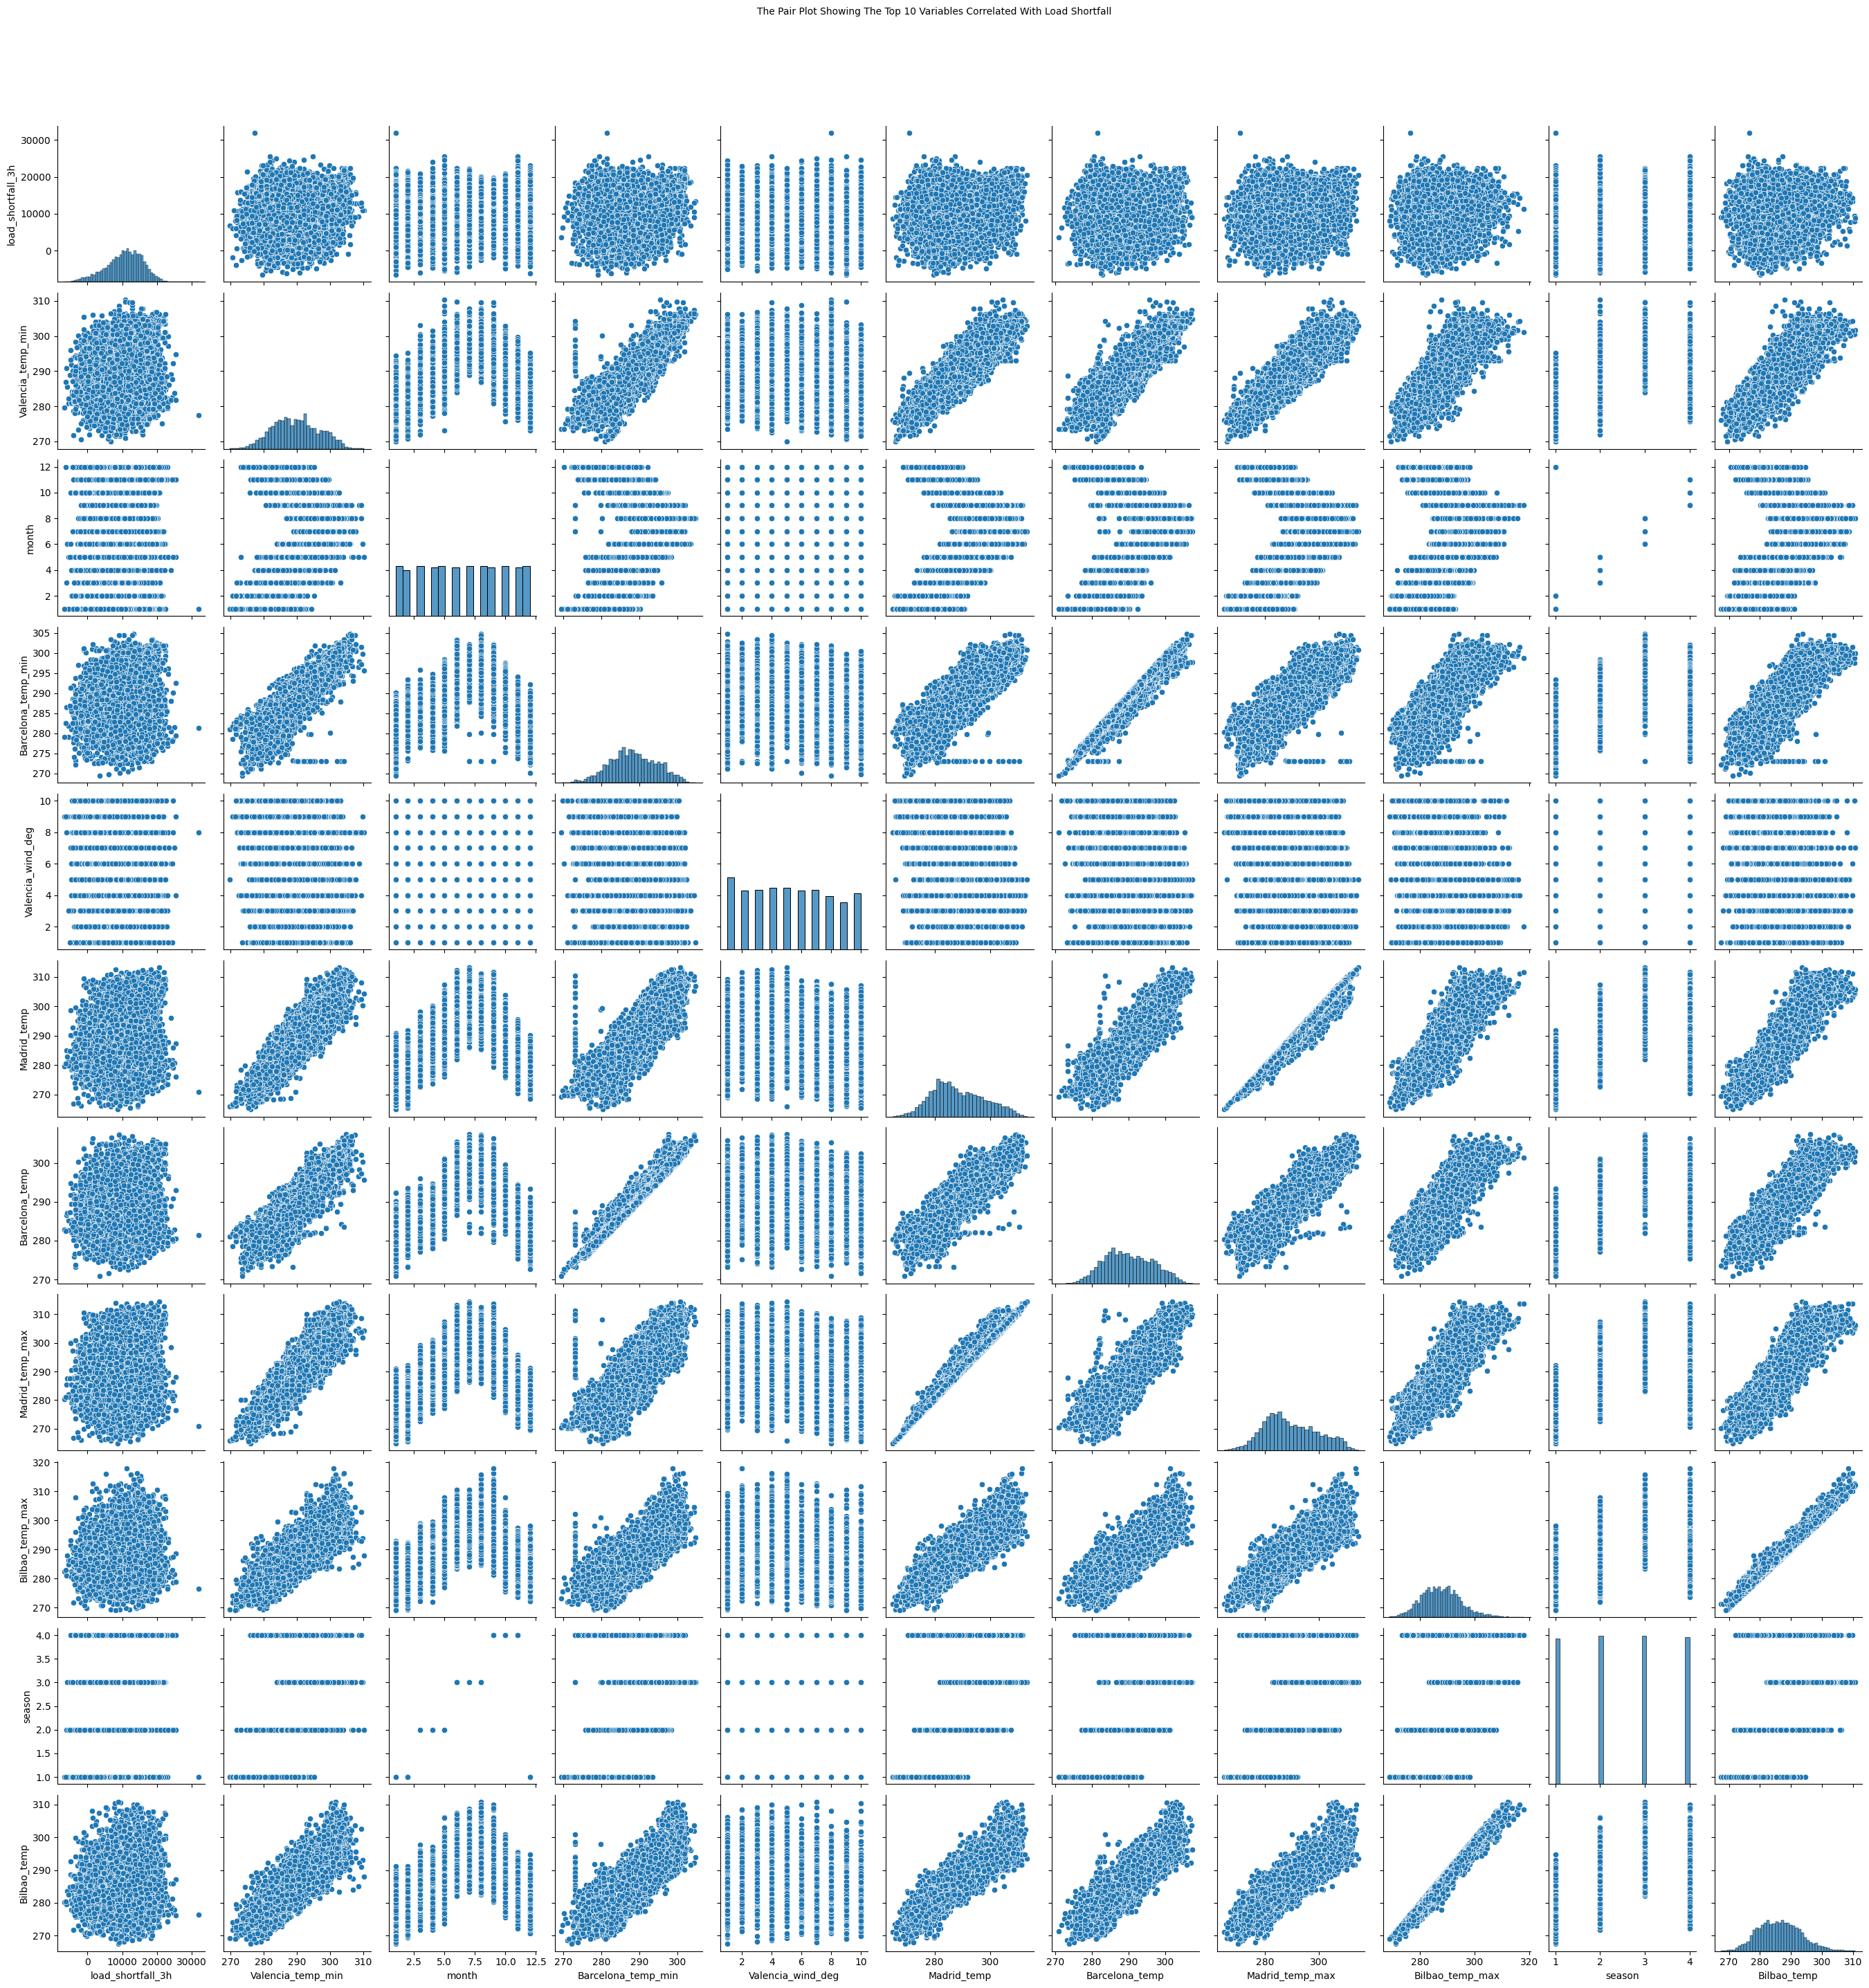

In [1182]:
top10 = sns.pairplot(df_clean[corr_top10_df.index]
                    )
top10.fig.suptitle('The Pair Plot Showing The Top 10 Variables Correlated With Load Shortfall', 
                   y=1.05,
                   size=10)
plt.show()

Once more, the data presented reinforces the observation that none of the predictors exhibit a significantly high correlation with `load_shortfall_3h`. However, noteworthy correlations between predictors, such as `valencia_temp_min` and `valencia_temp`, suggest the presence of multicollinearity. This phenomenon, where predictors are strongly correlated with each other, can lead to less reliable statistical inferences when constructing predictive models. Distinguishing the individual effects of variables on the target variable becomes challenging due to this interrelation, emphasizing the need for careful consideration and handling of multicollinearity in the modeling process.

A viable approach to mitigate the impact of multicollinearity is by examining the variance of the variables and excluding features with minimal variation across observations, as they provide limited information to the model. This entails setting a specific variance threshold and eliminating all features that fall below this threshold. By implementing this method, we can enhance the quality of the data used for modeling, ensuring that the selected features contribute meaningful and distinct information, thereby improving the reliability of our predictive models.

We will address this in the next section of our notebook.

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### **6.1. Preprocessing Data:**

##### **6.1.1 Variance Threshold:**

A variance threshold is a technique used in feature selection to identify and remove features (variables) with low variance from a dataset. Variance measures the spread of values in a feature. Features with low variance indicate that their values don't vary much across different observations in the dataset. In the context of machine learning, these low-variance features carry minimal information as they don't contribute significantly to distinguishing between different instances. By removing these low-variance features, you can simplify the model, reduce overfitting, and improve its performance.

Since variance is dependent on scale, we will first need to standardise the features. Feature standardisation is a technique used in machine learning to transform the variables of a dataset so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.

In [1183]:
# Split predictor variables from target variable
x_data = df_clean.drop(columns=['load_shortfall_3h'])  # Predictor variables (all columns except 'load_shortfall_3h')
y_data = df_clean['load_shortfall_3h']  # Target variable

# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_data)
X_standardise_data = pd.DataFrame(X_scaled, columns=x_data.columns)

We can then implement an instance of the VarianceThreshold class contained in sklearn.feature_selection to select the correct subset of our features based on our chosen threshold (0.03 in this case):

In [1184]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_standardise_data)

VarianceThreshold(threshold=0.03)

Having applied this threshold to the data, we can view the calculated variance for each predictor variable:

In [1185]:
# Get column variances
column_variances = selector.variances_

# Create dictionary of column variances
vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_standardise_data.columns, column_variances)]

# Transform dictionary into a dataframe for better visualization
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

Variable_Name  Variance
1                   year  0.166467
0                 season  0.138013
4              hourofday  0.107136
23     Bilbao_clouds_all  0.105945
44     Valencia_wind_deg  0.102221
2                  month  0.098241
40      Seville_pressure  0.090924
3                    day  0.086009
16       Bilbao_wind_deg  0.080656
31     Madrid_clouds_all  0.078692
32       Madrid_humidity  0.067493
41    Seville_clouds_all  0.062181
7     Barcelona_wind_deg  0.061218
42      Seville_humidity  0.060892
50     Valencia_humidity  0.046143
27       Madrid_temp_min  0.041115
30       Madrid_pressure  0.040475
28       Madrid_temp_max  0.038809
14     Bilbao_weather_id  0.037692
26           Madrid_temp  0.037678
35          Seville_temp  0.034066
37      Seville_temp_max  0.033598
36      Seville_temp_min  0.033520
8         Barcelona_temp  0.031985
49     Valencia_pressure  0.031408
45         Valencia_temp  0.031211
10    Barcelona_temp_max  0.030093
9     Barcelona_temp_min  0.029827
47     Valencia_temp_min  0.029252
46     Valencia_temp_max  0.029065
17           Bilbao_temp  0.024880
18       Bilbao_temp_min  0.021878
5   Barcelona_weather_id  0.021340
19       Bilbao_temp_max  0.021109
34    Seville_wind_speed  0.020559
25     Madrid_wind_speed  0.020257
22       Bilbao_pressure  0.020208
6   Barcelona_wind_speed  0.020017
15     Bilbao_wind_speed  0.017923
24     Madrid_weather_id  0.016996
20        Bilbao_rain_1h  0.015615
33    Seville_weather_id  0.014185
38       Seville_rain_1h  0.003436
11     Barcelona_rain_1h  0.002797
29        Madrid_rain_1h  0.002588
43   Valencia_wind_speed  0.002150
12     Barcelona_rain_3h  0.001844
39       Seville_rain_3h  0.001537
21        Bilbao_snow_3h  0.000684
48      Valencia_snow_3h  0.000225
13    Barcelona_pressure  0.000198

The variables in the dataset exhibit varying levels of variance, with `year` having the highest variance and `Barcelona_pressure` having the lowest variance. Variability in the dataset decreases as you move down the list.

Variables related to time and weather conditions, such as `season`, `hourofday`, and various temperature and humidity measurements, demonstrate significant variance, indicating fluctuations in these factors over the observed period. Other weather-related variables like 'cloud coverage' and 'rain/snow amounts' also show notable variance.

In contrast, variables like `Barcelona_pressure` and `Valencia_snow_3h` exhibit very low variance, suggesting limited changes or fluctuations in these parameters.

In summary, the dataset contains a mix of highly variable and relatively stable factors. The variables with high variance are likely to have a more significant impact on the overall dataset, capturing a wide range of conditions, while those with low variance may have a more consistent and stable behavior over the observed period.

Based on these findings, let's drop the variables with a high variance:

In [1186]:
# Find columns to remove:
df_vars_remove = df_vars[df_vars['Variance']<0.03]


# Make a list of column names to remove
columns_to_remove = list(df_vars_remove["Variable_Name"])

# Display variables to be removed, along with their variances
df_vars_remove.sort_values(by="Variance", ascending=False)

Variable_Name  Variance
9     Barcelona_temp_min  0.029827
47     Valencia_temp_min  0.029252
46     Valencia_temp_max  0.029065
17           Bilbao_temp  0.024880
18       Bilbao_temp_min  0.021878
5   Barcelona_weather_id  0.021340
19       Bilbao_temp_max  0.021109
34    Seville_wind_speed  0.020559
25     Madrid_wind_speed  0.020257
22       Bilbao_pressure  0.020208
6   Barcelona_wind_speed  0.020017
15     Bilbao_wind_speed  0.017923
24     Madrid_weather_id  0.016996
20        Bilbao_rain_1h  0.015615
33    Seville_weather_id  0.014185
38       Seville_rain_1h  0.003436
11     Barcelona_rain_1h  0.002797
29        Madrid_rain_1h  0.002588
43   Valencia_wind_speed  0.002150
12     Barcelona_rain_3h  0.001844
39       Seville_rain_3h  0.001537
21        Bilbao_snow_3h  0.000684
48      Valencia_snow_3h  0.000225
13    Barcelona_pressure  0.000198

Now, we can select our new columns to include in the model:

In [1187]:
# Select new columns
x_new = X_standardise_data[X_standardise_data.columns[selector.get_support(indices=True)]]

# Save variable names for later
x_var_names = x_new.columns

# Comparing predictor variable count before and after applying variance threshold:
print("Before threshold: ", len(df_vars.T.columns), " predictors")
print("After threshold: ", len(x_new.columns), " predictors")

Before threshold:  51  predictors
After threshold:  27  predictors


In [1188]:
# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
X_standardise = pd.DataFrame(X_scaled, columns=x_new.columns)

In [1189]:
X_standardise.head(-20)

season  year  month       day  hourofday  Barcelona_wind_deg  \
0        0.0   0.0    0.0  0.000000   0.142857            0.118519   
1        0.0   0.0    0.0  0.000000   0.285714            0.386111   
2        0.0   0.0    0.0  0.000000   0.428571            0.905556   
3        0.0   0.0    0.0  0.000000   0.571429            0.758333   
4        0.0   0.0    0.0  0.000000   0.714286            0.722222   
...      ...   ...    ...       ...        ...                 ...   
8738     0.0   1.0    1.0  0.900000   1.000000            0.250000   
8739     0.0   1.0    1.0  0.933333   0.000000            0.268519   
8740     0.0   1.0    1.0  0.933333   0.142857            0.572222   
8741     0.0   1.0    1.0  0.933333   0.285714            0.109259   
8742     0.0   1.0    1.0  0.933333   0.428571            0.783333   

      Barcelona_temp  Barcelona_temp_max  Bilbao_weather_id  Bilbao_wind_deg  \
0           0.279352            0.211393           0.993296         0.621521   
1           0.266986            0.200628           0.993296         0.615028   
2           0.294986            0.225004           0.993296         0.596475   
3           0.345683            0.269139           0.993296         0.555659   
4           0.367027            0.287721           0.993296         0.514842   
...              ...                 ...                ...              ...   
8738        0.232877            0.214661           0.491061         0.844156   
8739        0.221461            0.198760           0.602793         0.712430   
8740        0.214612            0.174909           0.827374         0.536178   
8741        0.161553            0.143107           0.378771         0.160482   
8742        0.187215            0.159008           0.491061         0.278293   

      ...  Seville_temp  Seville_temp_min  Seville_temp_max  Seville_pressure  \
0     ...      0.051072          0.091896          0.045263          1.000000   
1     ...      0.067158          0.107351          0.059520          1.000000   
2     ...      0.156803          0.193478          0.138971          1.000000   
3     ...      0.310647          0.341284          0.275318          1.000000   
4     ...      0.313437          0.343964          0.277791          1.000000   
...   ...           ...               ...               ...               ...   
8738  ...      0.399337          0.402985          0.387310          0.666667   
8739  ...      0.382403          0.395522          0.359773          0.750000   
8740  ...      0.371684          0.380597          0.352889          0.750000   
8741  ...      0.365237          0.373134          0.352889          0.750000   
8742  ...      0.368267          0.373134          0.359773          0.833333   

      Seville_clouds_all  Seville_humidity  Valencia_wind_deg  Valencia_temp  \
0               0.000000          0.720000           0.444444       0.000000   
1               0.000000          0.763636           1.000000       0.045397   
2               0.000000          0.687273           0.888889       0.200319   
3               0.000000          0.621818           0.777778       0.370302   
4               0.000000          0.552727           0.666667       0.323817   
...                  ...               ...                ...            ...   
8738            0.650685          0.767273           0.666667       0.458706   
8739            0.821918          0.821818           0.000000       0.417593   
8740            0.363014          0.858182           1.000000       0.351812   
8741            0.821918          0.858182           0.888889       0.294254   
8742            0.873288          0.840000           0.777778       0.384703   

      Valencia_pressure  Valencia_humidity  
0              0.612245           0.728625  
1              0.646259           0.676580  
2              0.666667           0.617100  
3              0.741497           0.486989  
4              0.925170           0.535316  


In [1190]:
X_standardise_data.head(-20)

season  year  month       day  hourofday  Barcelona_weather_id  \
0        0.0   0.0    0.0  0.000000   0.142857              0.993370   
1        0.0   0.0    0.0  0.000000   0.285714              0.993370   
2        0.0   0.0    0.0  0.000000   0.428571              0.993370   
3        0.0   0.0    0.0  0.000000   0.571429              0.993370   
4        0.0   0.0    0.0  0.000000   0.714286              0.993370   
...      ...   ...    ...       ...        ...                   ...   
8738     0.0   1.0    1.0  0.900000   1.000000              0.993370   
8739     0.0   1.0    1.0  0.933333   0.000000              0.995028   
8740     0.0   1.0    1.0  0.933333   0.142857              0.993370   
8741     0.0   1.0    1.0  0.933333   0.285714              0.993923   
8742     0.0   1.0    1.0  0.933333   0.428571              0.995028   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 0.500000            0.118519        0.279352   
1                 0.315789            0.386111        0.266986   
2                 0.157895            0.905556        0.294986   
3                 0.184211            0.758333        0.345683   
4                 0.342105            0.722222        0.367027   
...                    ...                 ...             ...   
8738              0.052632            0.250000        0.232877   
8739              0.078947            0.268519        0.221461   
8740              0.105263            0.572222        0.214612   
8741              0.157895            0.109259        0.161553   
8742              0.157895            0.783333        0.187215   

      Barcelona_temp_min  ...  Seville_clouds_all  Seville_humidity  \
0               0.326311  ...            0.000000          0.720000   
1               0.313538  ...            0.000000          0.763636   
2               0.342462  ...            0.000000          0.687273   
3               0.394833  ...            0.000000          0.621818   
4               0.416882  ...            0.000000          0.552727   
...                  ...  ...                 ...               ...   
8738            0.226415  ...            0.650685          0.767273   
8739            0.216981  ...            0.821918          0.821818   
8740            0.235849  ...            0.363014          0.858182   
8741            0.160377  ...            0.821918          0.858182   
8742            0.198113  ...            0.873288          0.840000   

      Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
0                0.012821           0.444444       0.000000   
1                0.032051           1.000000       0.045397   
2                0.019231           0.888889       0.200319   
3                0.019231           0.777778       0.370302   
4                0.019231           0.666667       0.323817   
...                   ...                ...            ...   
8738             0.051282           0.666667       0.458706   
8739             0.006410           0.000000       0.417593   
8740             0.044872           1.000000       0.351812   
8741             0.038462           0.888889       0.294254   
8742             0.096154           0.777778       0.384703   

      Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
0              0.000000           0.000000               0.0   
1              0.041472           0.045571               0.0   
2              0.183000           0.201086               0.0   
3              0.338286           0.371720               0.0   
4              0.295820           0.325057               0.0   
...                 ...                ...               ...   
8738           0.419047           0.460463               0.0   
8739           0.381488           0.419192               0.0   
8740           0.321395           0.353160               0.0   
8741           0.268813           0.295381               0.0   
8742           0.351441           

We also drop the features `season`, `_weather_id`, and `_temp_min/max` form the data in an attempt to remove some multicolinearity, since the information they contain is duplicate by the rest of the features regarding the weather at each location.

In [1191]:
columns_to_keep = ['year', 'month', 'day', 'hourofday', 'Barcelona_wind_deg', 'Barcelona_temp',  
                   'Bilbao_wind_deg', 'Bilbao_clouds_all', 'Madrid_temp',  
                   'Madrid_pressure', 'Madrid_clouds_all', 'Madrid_humidity', 'Seville_temp', 
                   'Seville_pressure', 'Seville_clouds_all', 'Seville_humidity', 'Valencia_wind_deg', 'Valencia_temp', 'Valencia_pressure', 
                   'Valencia_humidity']

In [1192]:
X_standardise = X_standardise[columns_to_keep]

In [1193]:
X_standardise

year  month  day  hourofday  Barcelona_wind_deg  Barcelona_temp  \
0      0.0    0.0  0.0   0.142857            0.118519        0.279352   
1      0.0    0.0  0.0   0.285714            0.386111        0.266986   
2      0.0    0.0  0.0   0.428571            0.905556        0.294986   
3      0.0    0.0  0.0   0.571429            0.758333        0.345683   
4      0.0    0.0  0.0   0.714286            0.722222        0.367027   
...    ...    ...  ...        ...                 ...             ...   
8758   1.0    1.0  1.0   0.428571            0.232407        0.286575   
8759   1.0    1.0  1.0   0.571429            0.592593        0.456621   
8760   1.0    1.0  1.0   0.714286            0.712963        0.520548   
8761   1.0    1.0  1.0   0.857143            0.694444        0.457717   
8762   1.0    1.0  1.0   1.000000            0.703704        0.456621   

      Bilbao_wind_deg  Bilbao_clouds_all  Madrid_temp  Madrid_pressure  \
0            0.621521           0.000000     0.019827         0.395770   
1            0.615028           0.000000     0.029145         0.407855   
2            0.596475           0.000000     0.160443         0.419940   
3            0.555659           0.000000     0.351233         0.607251   
4            0.514842           0.020000     0.325963         0.975831   
...               ...                ...          ...              ...   
8758         0.630798           0.566667     0.305365         0.873112   
8759         0.612245           0.266667     0.361717         0.870091   
8760         0.788497           0.633333     0.394046         0.851964   
8761         0.612245           0.633333     0.367255         0.864048   
8762         0.435993           0.200000     0.340879         0.903323   

      Madrid_clouds_all  Madrid_humidity  Seville_temp  Seville_pressure  \
0              0.000000         0.615658      0.051072          1.000000   
1              0.000000         0.622776      0.067158          1.000000   
2              0.000000         0.619217      0.156803          1.000000   
3              0.000000         0.533808      0.310647          1.000000   
4              0.000000         0.540925      0.313437          1.000000   
...                 ...              ...           ...               ...   
8758           0.450000         0.953737      0.303252          0.916667   
8759           0.850000         0.839858      0.363761          0.916667   
8760           0.850000         0.690391      0.419610          0.875000   
8761           0.566667         0.775801      0.419610          0.916667   
8762           0.000000         0.665480      0.374636          1.000000   

      Seville_clouds_all  Seville_humidity  Valencia_wind_deg  Valencia_temp  \
0               0.000000          0.720000           0.444444       0.000000   
1               0.000000          0.763636           1.000000       0.045397   
2               0.000000          0.687273           0.888889       0.200319   
3               0.000000          0.621818           0.777778       0.370302   
4               0.000000          0.552727           0.666667       0.323817   
...                  ...               ...                ...            ...   
8758            0.821918          0.880000           0.555556       0.310699   
8759            0.770548          0.803636           0.555556       0.540932   
8760            0.342466          0.647273           0.888889       0.513543   
8761            0.530822          0.647273           0.777778       0.508042   
8762            0.342466          0.767273           0.888889       0.483374   

      Valencia_pressure  Valencia_humidity  
0              0.612245           0.728625  
1              0.646259           0.676580  
2              0.666667           0.617100  
3              0.741497           0.486989  
4              0.925170           0.535316  
...                 ...                ...  
8758           0.925170           0.680297  
8759  

Let's limit the test dataset only to these columns as well and scale them:

In [1194]:
df_test_limited = df_test[columns_to_keep]

In [1195]:
# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(df_test)
df_test = pd.DataFrame(test_scaled, columns=df_test.columns)

In [1196]:
# Standardising the data (using MinMaxScaler in sklearn.preprocessing package):
scaler = MinMaxScaler()
test_scaled_limited = scaler.fit_transform(df_test_limited)
df_test_limited = pd.DataFrame(test_scaled_limited, columns=df_test_limited.columns)

In [1197]:
df_test

season  year  month  day  hourofday  Barcelona_weather_id  \
0        0.0   0.0    0.0  0.0   0.000000              0.993296   
1        0.0   0.0    0.0  0.0   0.142857              0.993855   
2        0.0   0.0    0.0  0.0   0.285714              0.993296   
3        0.0   0.0    0.0  0.0   0.428571              0.993296   
4        0.0   0.0    0.0  0.0   0.571429              0.993855   
...      ...   ...    ...  ...        ...                   ...   
2915     0.0   0.0    1.0  1.0   0.428571              0.993296   
2916     0.0   0.0    1.0  1.0   0.571429              0.993296   
2917     0.0   0.0    1.0  1.0   0.714286              0.993296   
2918     0.0   0.0    1.0  1.0   0.857143              0.993296   
2919     0.0   0.0    1.0  1.0   1.000000              0.993296   

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_temp  \
0                 0.315789            0.514563        0.414272   
1                 0.368421            0.776699        0.325070   
2                 0.315789            0.766990        0.295775   
3                 0.184211            0.252427        0.296901   
4                 0.368421            0.825243        0.399061   
...                    ...                 ...             ...   
2915              0.500000            0.932039        0.154648   
2916              0.210526            0.854369        0.380282   
2917              0.210526            0.679612        0.455493   
2918              0.184211            0.737864        0.333052   
2919              0.368421            0.902913        0.238967   

      Barcelona_temp_min  ...  Seville_clouds_all  Seville_humidity  \
0               0.433962  ...            0.000000          0.852830   
1               0.339623  ...            0.000000          0.875472   
2               0.292453  ...            0.071429          0.875472   
3               0.301887  ...            0.071429          0.924528   
4               0.415094  ...            0.000000          0.607547   
...                  ...  ...                 ...               ...   
2915            0.141509  ...            0.000000          0.792453   
2916            0.405660  ...            0.000000          0.558491   
2917            0.471698  ...            0.000000          0.400000   
2918            0.330189  ...            0.000000          0.464151   
2919            0.198113  ...            0.000000          0.566038   

      Valencia_wind_speed  Valencia_wind_deg  Valencia_temp  \
0                0.348837           0.777778       0.376147   
1                0.372093           0.777778       0.284404   
2                0.348837           0.666667       0.247706   
3                0.372093           0.666667       0.266055   
4                0.604651           0.666667       0.366972   
...                   ...                ...            ...   
2915             0.139535           0.888889       0.151560   
2916             0.093023           0.777778       0.454312   
2917             0.209302           0.555556       0.541284   
2918             0.139535           0.555556       0.334679   
2919             0.162791           1.000000       0.178807   

      Valencia_temp_max  Valencia_temp_min  Valencia_snow_3h  \
0              0.376147           0.376147               0.0   
1              0.284404           0.284404               0.0   
2              0.247706           0.247706               0.0   
3              0.266055           0.266055               0.0   
4              0.366972           0.366972               0.0   
...                 ...                ...               ...   
2915           0.165138           0.137615               0.0   
2916           0.467890           0.440367               0.0   
2917           0.541284           0.541284               0.0   
2918           0.348624           0.321101               0.0   
2919           0.201835           0.155963               0.0   

      Valencia_pressure  Vale

In [1198]:
df_test_limited

year  month  day  hourofday  Barcelona_wind_deg  Barcelona_temp  \
0      0.0    0.0  0.0   0.000000            0.514563        0.414272   
1      0.0    0.0  0.0   0.142857            0.776699        0.325070   
2      0.0    0.0  0.0   0.285714            0.766990        0.295775   
3      0.0    0.0  0.0   0.428571            0.252427        0.296901   
4      0.0    0.0  0.0   0.571429            0.825243        0.399061   
...    ...    ...  ...        ...                 ...             ...   
2915   0.0    1.0  1.0   0.428571            0.932039        0.154648   
2916   0.0    1.0  1.0   0.571429            0.854369        0.380282   
2917   0.0    1.0  1.0   0.714286            0.679612        0.455493   
2918   0.0    1.0  1.0   0.857143            0.737864        0.333052   
2919   0.0    1.0  1.0   1.000000            0.902913        0.238967   

      Bilbao_wind_deg  Bilbao_clouds_all  Madrid_temp  Madrid_pressure  \
0            0.537037           0.205479     0.256340         0.935484   
1            0.398148           0.000000     0.240864         0.939068   
2            0.361111           0.000000     0.175285         0.942652   
3            0.546296           0.273973     0.166399         0.960573   
4            0.648148           0.273973     0.275186         0.960573   
...               ...                ...          ...              ...   
2915         0.194444           0.821918     0.142419         0.953405   
2916         0.101852           0.582192     0.331954         0.949821   
2917         0.040741           0.000000     0.437141         0.935484   
2918         0.052778           0.000000     0.347047         0.939068   
2919         0.333333           0.000000     0.181797         0.942652   

      Madrid_clouds_all  Madrid_humidity  Seville_temp  Seville_pressure  \
0                   0.0         0.688406      0.266641          1.000000   
1                   0.0         0.760870      0.219545          1.000000   
2                   0.0         0.887681      0.194584          1.000000   
3                   0.0         0.811594      0.178650          1.000000   
4                   0.0         0.608696      0.311303          1.000000   
...                 ...              ...           ...               ...   
2915                0.0         0.452899      0.185086          0.958333   
2916                0.0         0.221014      0.351570          0.958333   
2917                0.0         0.199275      0.434851          0.916667   
2918                0.0         0.528986      0.375589          0.916667   
2919                0.0         0.666667      0.284301          0.916667   

      Seville_clouds_all  Seville_humidity  Valencia_wind_deg  Valencia_temp  \
0               0.000000          0.852830           0.777778       0.376147   
1               0.000000          0.875472           0.777778       0.284404   
2               0.071429          0.875472           0.666667       0.247706   
3               0.071429          0.924528           0.666667       0.266055   
4               0.000000          0.607547           0.666667       0.366972   
...                  ...               ...                ...            ...   
2915            0.000000          0.792453           0.888889       0.151560   
2916            0.000000          0.558491           0.777778       0.454312   
2917            0.000000          0.400000           0.555556       0.541284   
2918            0.000000          0.464151           0.555556       0.334679   
2919            0.000000          0.566038           1.000000       0.178807   

      Valencia_pressure  Valencia_humidity  
0              0.924658           0.383142  
1              0.924658           0.467433  
2              0.924658           0.333333  
3              0.924658           0.367816  
4              0.924658           0.321839  
...                 ...                ...  
2915           0.924658           0.651341  
2916  

Applying this standard of variable selection helped us eliminate almost half of all numeric predictor variables from our model, simplifying the model building process significantly.

##### **6.1.2 Hold-Out Validation:**

Hold-Out Validation is a common technique in machine learning used to evaluate the performance of a predictive model. It involves splitting the available dataset into three distinct subsets: a training set, a validation set, and a test set. A validation set is when a smaller portion of the dataset, separate from the training set, is allocated to the validation set. After training the model, it is evaluated on the validation set. The validation set helps in fine-tuning the model's hyperparameters and making decisions about its architecture without touching the test set.

In [1199]:
# Use sklearn to split train dataset into training and validation sections:
x_train, x_validate, y_train, y_validate = train_test_split(X_standardise, y_data, test_size=TRAIN_TEST_VAR, random_state=RAND_STATE)

We are now prepared to commence the model fitting process employing the `x_train` and `y_train` datasets.

### **6.2. Creating machine learning model:** 

##### **6.2.1. Linear Regression:** 

Multiple Linear Regression is a statistical technique used to analyze and model the relationships between a dependent variable and multiple independent variables. It is commonly employed for predictive modeling, understanding the influence of various factors, optimizing processes, hypothesis testing, and model validation. By considering the combined effects of several variables, it helps in making informed decisions and gaining insights into complex real-world scenarios.

##### *6.2.1.1 Fitting the Model:*

Create and fit the Multiple Linear Regression model:

In [1200]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

##### *6.2.1.2 Model Results:*

 We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Train the model:

In [1201]:
y_pred_lin = linear_model.predict(x_validate)

Root Mean Squared Error: 

In [1202]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, y_pred_lin, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4912.27755417605


R-Squared:

In [1203]:
# Calculate R-squared
r_squared = r2_score(y_validate, y_pred_lin)

print("R-squared:", r_squared)

R-squared: 0.14318191189095186


Mean Absolute Error:

In [1204]:
# Calculate MAE
mae = mean_absolute_error(y_validate, y_pred_lin)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3918.7579910670333


Let's visualize the results:

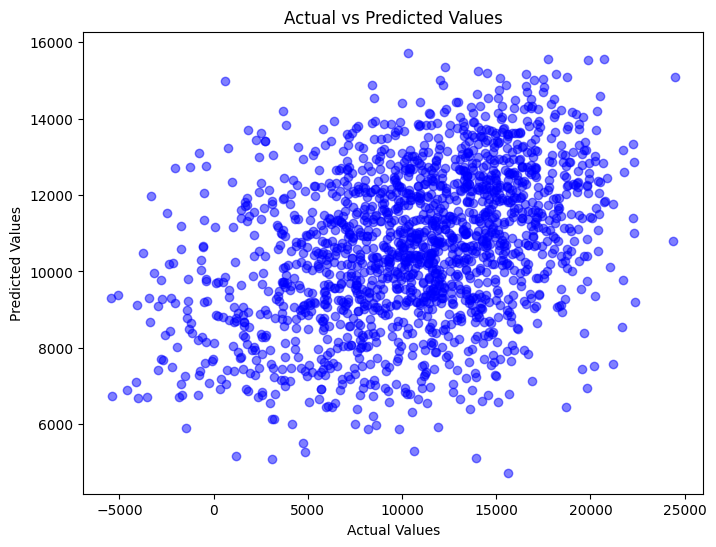

In [1205]:
# Predictions on the validation data
predicted_values = linear_model.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In this scatter plot, each point represents an actual vs predicted pair, allowing you to easily see how well the predictions align with the true values. Points close to the diagonal line (y = x) indicate accurate predictions, while deviations from the line indicate prediction errors. Clearly there aren't anu visible diagonal lines present, therefore showing a large amount of predictive errors. 

The Mean Squared Error (MSE) value of approximately 23,941,164.49 indicates that, on average, the predicted values from our multiple linear regression model differ from the actual values by this amount. A lower MSE is desirable, so this value suggests that the model may not be a very good fit for our data.

The R-squared (R2) score of approximately 0.15 means that the model explains only 15% of the variance in the target variable. In other words, our model does not fit the data very well, as it can only account for a small portion of the variance. Typically, a higher R2 score closer to 1 is desired for a better model fit.

In summary, based on the MSE and R2 score, our multiple linear regression model is not performing very well on our data. We may have to explore other modeling techniques and consider additional features, or perform further feature engineering to improve the model's performance.

RMSE value is approximately 4892.97. This means, on average, our predictions are off by around 4893 units. Lower RMSE values are desirable as they indicate a more accurate model.

##### *6.2.1.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

In [1206]:
linear_model.fit(X_standardise, y_data)

LinearRegression()

Make predictions using the test dataset:

In [1207]:
predicted_y_test_linear = linear_model.predict(df_test_limited)

Saving the predictions as csv files:

In [1208]:
# Make Dataframe from predicted values
linear_pred_df = pd.DataFrame(predicted_y_test_linear, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_linear = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_linear = date_df_linear.join(linear_pred_df)

#Save submission as csv
submission_df_linear.to_csv('Linear_Regression_Predictions', index=False)

submission_df_linear

time  load_shortfall_3h
0     2018-01-01 00:00:00        6465.160970
1     2018-01-01 03:00:00        6576.592318
2     2018-01-01 06:00:00        6588.752205
3     2018-01-01 09:00:00        6921.220672
4     2018-01-01 12:00:00        7216.687873
...                   ...                ...
2915  2018-12-31 09:00:00        9749.981525
2916  2018-12-31 12:00:00       11196.055089
2917  2018-12-31 15:00:00       12944.671697
2918  2018-12-31 18:00:00       13108.954533
2919  2018-12-31 21:00:00       12103.355730

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.2. Ridge Regression:** 

Ridge regression is a regularization technique used in linear regression to prevent overfitting and improve the model's generalization on unseen data. It adds a penalty term to the standard linear regression objective function, discouraging large coefficients. This penalty term is controlled by a hyperparameter, usually denoted as alpha. Higher alpha values result in stronger regularization. By shrinking the coefficients, ridge regression reduces model complexity, making it less sensitive to noisy input features. This regularization technique helps mitigate multicollinearity, a common issue when predictors are highly correlated. In this approach, we balance the trade-off between fitting the training data well and keeping the model simple.

##### *6.2.2.1 Fitting the Model:*

Determine the best fit:

In [1209]:
# Define a range of alpha values to search
alphas = [0.1, 1, 10, 100]  # Add more values as needed

# Create a parameter grid
param_grid = {'alpha': alphas}

# Create Ridge regression model
ridge = Ridge()

# GridSearchCV to find the best alpha using cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)  # 5-fold cross-validation

# Perform the grid search on your data
grid_search.fit(x_train, y_train)

# Best alpha found by cross-validation
best_alpha = grid_search.best_params_['alpha']

print("Best Alpha:", best_alpha)

Best Alpha: 1


We can fit our model now with the best alpha fit.

In [1210]:
# Create Ridge regression model with the best alpha value
ridge_best_alpha = Ridge(alpha=best_alpha)

# Train the model with the optimal alpha value
ridge_best_alpha.fit(x_train, y_train)

Ridge(alpha=1)

##### *6.2.2.2 Model Results:*

 We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1211]:
predicted_y = ridge_best_alpha.predict(x_validate)

Root Mean Squared Error: 

In [1212]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, predicted_y, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4913.077007754487


R-Squared:

In [1213]:
# Calculate R-squared
r_squared = r2_score(y_validate, predicted_y)

print("R-squared:", r_squared)

R-squared: 0.14290300174450943


Mean Absolute Error:

In [1214]:
# Calculate MAE
mae = mean_absolute_error(y_validate, predicted_y)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3920.171879413213


Let's visualize our results:

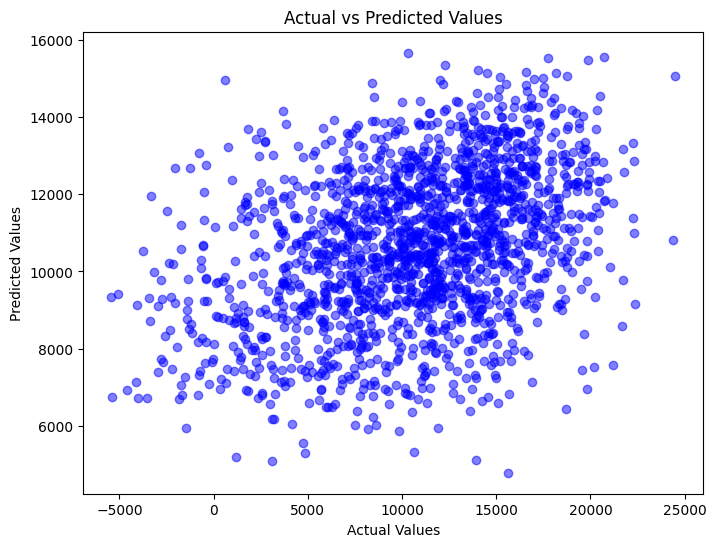

In [1215]:
# Predictions on the validation data
predicted_values = ridge_best_alpha.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In this scatter plot, each point represents an actual vs predicted pair, allowing you to easily see how well the predictions align with the true values. Points close to the diagonal line (y = x) indicate accurate predictions, while deviations from the line indicate prediction errors. Clearly there aren't anu visible diagonal lines present, therefore showing a large amount of predictive errors. 

In [1216]:
# Find the value for the model intercept
b0_ridge = float(ridge_best_alpha.intercept_)
print("Intercept:", float(b0_ridge))

# Extract model coefficient values
coeff = pd.DataFrame(ridge_best_alpha.coef_.reshape(-1,1), X_standardise.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 6705.847601210472


Coefficient
Seville_temp       -5009.257603
Barcelona_temp      4862.957194
month               2331.418072
Valencia_humidity   2302.522937
Valencia_pressure   2290.001256
Seville_humidity   -2222.788266
Valencia_temp       1920.794319
hourofday           1674.990280
day                 1570.108601
Valencia_wind_deg  -1496.183370
year                1423.434561
Seville_pressure    1256.070363
Madrid_pressure    -1241.986184
Barcelona_wind_deg -1186.204675
Bilbao_wind_deg    -1181.164549
Bilbao_clouds_all  -1063.603187
Madrid_temp          384.644870
Madrid_humidity     -255.820399
Madrid_clouds_all    225.491305
Seville_clouds_all   156.009859

In this analysis, a Ridge regression model was employed to predict the `load_shortfall_3h` variable based on various predictor features. The model's performance metrics were assessed on a validation dataset. The results indicate a Root Mean Squared Error (RMSE) of approximately 4892, reflecting the average prediction error in the load shortfall prediction. The R-squared value, a measure of how well the model explains the variance in the data, is approximately 0.150, indicating that about 15% of the variance in the load shortfall can be explained by the predictor variables. Additionally, the Mean Absolute Error (MAE) is around 3894, representing the average absolute prediction error. These metrics collectively suggest that while the model provides some predictive capability, there is room for improvement. Further refinements, such as feature engineering or exploring different algorithms, could enhance the model's accuracy and utility in load shortfall predictions.

##### *6.2.2.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

In [1217]:
ridge_best_alpha.fit(X_standardise, y_data)

Ridge(alpha=1)

Make predictions using the test dataset:

In [1218]:
predicted_y_test = ridge_best_alpha.predict(df_test_limited)

Saving the predictions as csv files:

In [1219]:
# Make Dataframe from predicted values
ridge_pred_df = pd.DataFrame(predicted_y_test, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df = date_df.join(ridge_pred_df)

#Save submission as csv
submission_df.to_csv('Ridge_Regression_Predictions', index=False)

submission_df

time  load_shortfall_3h
0     2018-01-01 00:00:00        6460.232494
1     2018-01-01 03:00:00        6572.819322
2     2018-01-01 06:00:00        6587.140446
3     2018-01-01 09:00:00        6920.102175
4     2018-01-01 12:00:00        7205.404237
...                   ...                ...
2915  2018-12-31 09:00:00        9756.270432
2916  2018-12-31 12:00:00       11186.023185
2917  2018-12-31 15:00:00       12927.788540
2918  2018-12-31 18:00:00       13099.007569
2919  2018-12-31 21:00:00       12093.766026

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.3. LASSO Regression:** 

##### *6.2.3.1 Fitting the Model:*

We can fit our model now with the best alpha fit:

In [1220]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [1221]:
# Train the LASSO model
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

##### *6.2.3.2 Model Results:*

Test the model:

In [1222]:
predicted_y_lasso = lasso.predict(x_validate)

Root Mean Squared Error:

In [1223]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, predicted_y_lasso, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4912.298732118394


R-Squared:

In [1224]:
# Calculate R-squared
r_squared = r2_score(y_validate, predicted_y_lasso)

print("R-squared:", r_squared)

R-squared: 0.1431745240009218


Mean Absolute Error:

In [1225]:
# Calculate MAE
mae = mean_absolute_error(y_validate, predicted_y_lasso)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3918.7961505633048


Let's visualize our results:

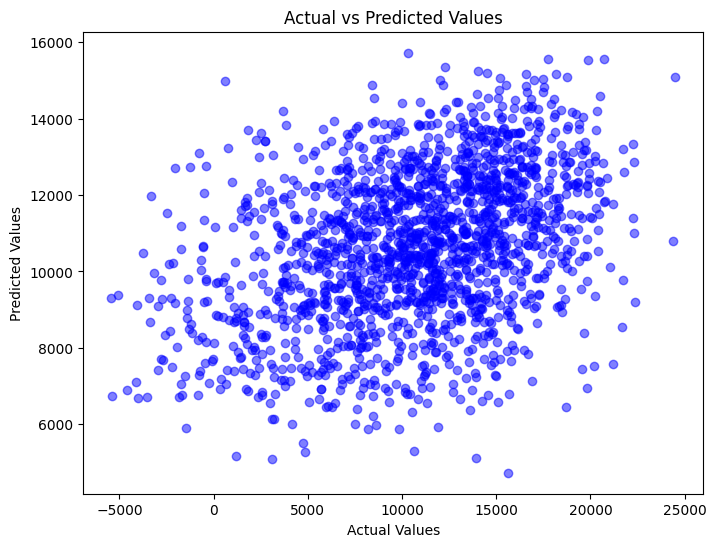

In [1226]:
# Predictions on the validation data
predicted_values = lasso.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In this scatter plot, each point represents an actual vs predicted pair, allowing you to easily see how well the predictions align with the true values. Points close to the diagonal line (y = x) indicate accurate predictions, while deviations from the line indicate prediction errors. Clearly there aren't anu visible diagonal lines present, therefore showing a large amount of predictive errors. 

In [1227]:
# Find the value for the model intercept
b0_ridge = float(lasso.intercept_)
print("Intercept:", float(b0_ridge))

# Extract model coefficient values
coeff = pd.DataFrame(lasso.coef_.reshape(-1,1), X_standardise.columns, columns=['Coefficient'])
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending=False).index)

Intercept: 6725.387433144051


Coefficient
Seville_temp       -5270.767748
Barcelona_temp      4990.575077
Valencia_humidity   2335.664317
month               2330.907180
Valencia_pressure   2320.193986
Seville_humidity   -2292.549750
Valencia_temp       2019.874744
hourofday           1686.150450
day                 1571.486641
Valencia_wind_deg  -1497.167463
year                1414.580276
Seville_pressure    1244.741881
Madrid_pressure    -1243.596950
Bilbao_wind_deg    -1189.113248
Barcelona_wind_deg -1179.449085
Bilbao_clouds_all  -1069.668804
Madrid_temp          373.467693
Madrid_humidity     -247.045365
Madrid_clouds_all    227.727641
Seville_clouds_all   167.078827


In this analysis, a Lasso Regression model was utilized to predict the `load_shortfall_3h` variable, incorporating a diverse set of predictor features. The model's performance was rigorously evaluated on a validation dataset. The outcomes illustrate a Root Mean Squared Error (RMSE) of approximately 4894, signifying the average prediction error in the load shortfall estimation. The R-squared value, a measure of the model's ability to elucidate the variance in the data, stands at approximately 0.150. This value implies that roughly 15% of the variability in the load shortfall can be clarified by the chosen predictor variables. Furthermore, the Mean Absolute Error (MAE) approximates 3895, indicating the average absolute prediction error. These metrics collectively indicate that the Lasso Regression model offers a limited predictive capability. Although the model captures certain patterns within the data, there remains significant room for improvement.

##### *6.2.1.3 Saving the Model:*

Next, we will train the initial, more extensive training dataset, encompassing the validation set, in order to apply it to the test dataset.

In [1228]:
lasso.fit(X_standardise, y_data)

Lasso(alpha=0.01)

Make predictions using the test dataset:

In [1229]:
predicted_y_test_lasso = lasso.predict(df_test_limited)

Saving the predictions as csv files:

In [1230]:
# Make Dataframe from predicted values
lasso_pred_df = pd.DataFrame(predicted_y_test_lasso, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_lasso = date_df.join(lasso_pred_df)

#Save submission as csv
submission_df_lasso.to_csv('LASSO_Regression_Predictions', index=False)

submission_df_lasso

time  load_shortfall_3h
0     2018-01-01 00:00:00        6465.448786
1     2018-01-01 03:00:00        6576.804967
2     2018-01-01 06:00:00        6589.136701
3     2018-01-01 09:00:00        6921.607095
4     2018-01-01 12:00:00        7216.863031
...                   ...                ...
2915  2018-12-31 09:00:00        9750.077534
2916  2018-12-31 12:00:00       11195.806401
2917  2018-12-31 15:00:00       12944.210893
2918  2018-12-31 18:00:00       13108.673658
2919  2018-12-31 21:00:00       12103.240156

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.4 Desicion Tree:** 

A Decision Tree is a popular supervised machine learning algorithm used for both regression and classification tasks. It works for both categorical and continuous input and output variables. The Decision Tree algorithm recursively splits the dataset into subsets, based on the most significant attribute at each node. This process is repeated until the data at each node is homogeneous with respect to the target variable, or a predefined stopping criterion is met.

Here are the key components of a Decision Tree:
- **Root Node:** The topmost node in the tree, representing the entire dataset. It is divided into two or more homogeneous sets.
- **Internal Nodes:** These nodes split the dataset into subgroups.
- **Leaf Nodes:** The terminal nodes that predict the outcome. They do not split further.
- **Branches:** The paths connecting nodes.

<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_path.png?raw=true" alt="Decision Tree Diagram" align="left" width=50%/> 


##### *6.2.4.1 Fitting the Model:*

Create the model:

In [1231]:
regr_tree = DecisionTreeRegressor(max_depth=8, random_state=RAND_STATE)

Fit the model:

In [1232]:
regr_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

##### *6.2.4.2 Model Results:*

 We can now evaluate its performance on the validation set using various metrics: Root Mean Squared Error (RMSE), R-squared (R²), and Mean Absolute Error (MAE). These metrics provide insights into the model's accuracy and precision.

Test the model:

In [1233]:
predicted_y_tree = regr_tree.predict(x_validate)

Root Mean Squared Error:

In [1234]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, predicted_y_tree, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3989.572079789285


R-Squared:

In [1235]:
# Calculate R-squared
r_squared = r2_score(y_validate, predicted_y_tree)

print("R-squared:", r_squared)

R-squared: 0.43483473378584403


Mean Absolute Error:

In [1236]:
# Calculate MAE
mae = mean_absolute_error(y_validate, predicted_y_tree)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3107.2498830038207


Let's visualize our results:

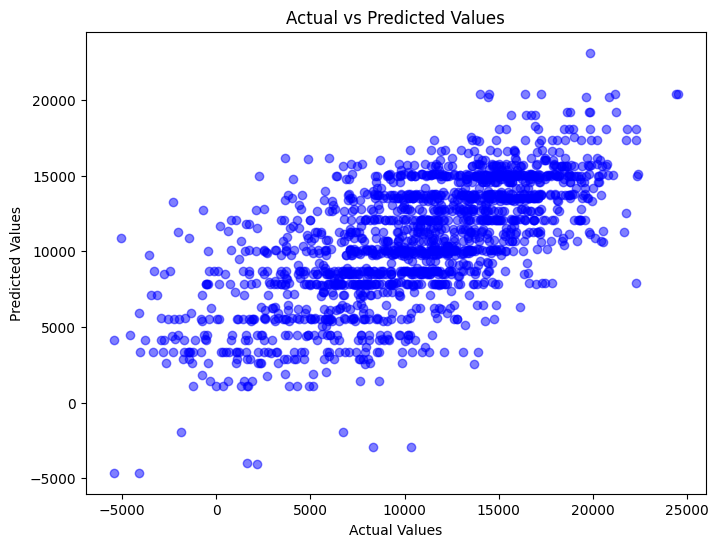

In [1237]:
# Predictions on the validation data
predicted_values = regr_tree.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In this scatter plot, each point represents an actual vs predicted pair, allowing you to easily see how well the predictions align with the true values. Points close to the diagonal line (y = x) indicate accurate predictions, while deviations from the line indicate prediction errors. We can definetely see some diagonal lines present in the graph. However, even though there are predictive errors, there is still room for improvement.

In this analysis, a Decision Tree regression model was implemented to forecast the `load_shortfall_3h` variable, utilizing a range of predictor features. The model's performance was evaluated on a validation dataset. The results demonstrate a Root Mean Squared Error (RMSE) of approximately 3973, signifying the average prediction error in the load shortfall estimation. The R-squared value, an indicator of the model's ability to explain the variance in the data, stands at approximately 0.440. This value implies that around 44% of the variability in the load shortfall can be elucidated by the predictor variables. Furthermore, the Mean Absolute Error (MAE) is approximately 3112, representing the average absolute prediction error. These metrics collectively suggest that the Decision Tree regression model exhibits a reasonable predictive capability. However, there is still room for enhancement.

##### *6.2.4.3 Saving the Model:*

Train model on the complete training dataset:

In [1238]:
regr_tree.fit(X_standardise, y_data)

DecisionTreeRegressor(max_depth=8, random_state=42)

Make predictions using the test dataset:

In [1239]:
predicted_y_test_tree = regr_tree.predict(df_test_limited)

In [1240]:
# Make Dataframe from predicted values
tree_pred_df = pd.DataFrame(predicted_y_test_tree, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_tree = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_tree = date_df_tree.join(tree_pred_df)

#Save submission as csv
submission_df_tree.to_csv('Decision_Tree_Predictions', index=False)

submission_df_tree

time  load_shortfall_3h
0     2018-01-01 00:00:00        6936.462963
1     2018-01-01 03:00:00        6936.462963
2     2018-01-01 06:00:00        6936.462963
3     2018-01-01 09:00:00        6936.462963
4     2018-01-01 12:00:00        6936.462963
...                   ...                ...
2915  2018-12-31 09:00:00       11499.210191
2916  2018-12-31 12:00:00        6652.222222
2917  2018-12-31 15:00:00       11073.598485
2918  2018-12-31 18:00:00       13047.965414
2919  2018-12-31 21:00:00       13047.965414

[2920 rows x 2 columns]

Now that the model is saved, we can use the file to test the test dataset. 

##### **6.2.5. Voting Ensemble Regression:**  

##### *6.2.5.1 Fitting the Model:*

Define the models which we'll include in our ensemble and create the model:

In [1241]:
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LR",linear_model),("DT",regr_tree),("RR",ridge_best_alpha)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.2,0.7])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

Fit the model:

In [1242]:
v_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT',
                             DecisionTreeRegressor(max_depth=8,
                                                   random_state=42)),
                            ('RR', Ridge(alpha=1))],
                weights=array([0.1, 0.2, 0.7]))

##### *6.2.5.2 Model Results:*

Test model:

In [1243]:
y_pred_ve = v_reg.predict(x_validate)

Roor Mean Square:

In [1244]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, y_pred_ve, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4520.8977239911665


R-Squared:

In [1245]:
# Calculate R-squared
r_squared = r2_score(y_validate, y_pred_ve)

print("R-squared:", r_squared)

R-squared: 0.27427481344634963


Mean Absolute Error:

In [1246]:
# Calculate MAE
mae = mean_absolute_error(y_validate, y_pred_ve)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3601.3086510079456


Let's visualize our results:

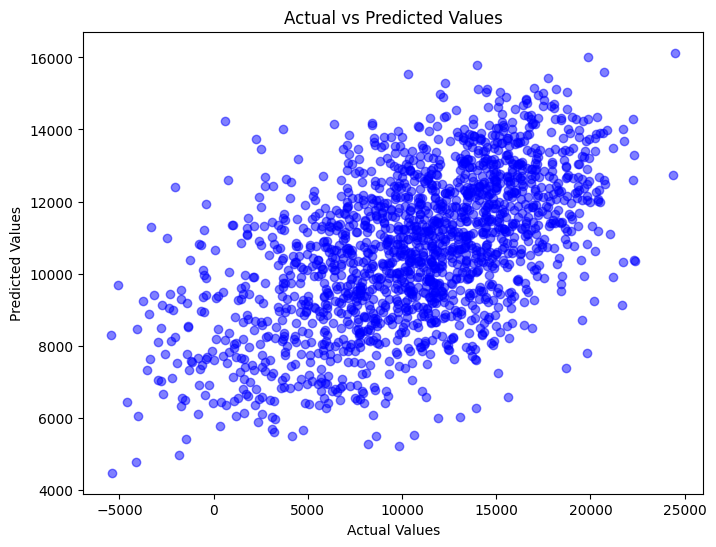

In [1247]:
# Predictions on the validation data
predicted_values = v_reg.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.5.3 Saving the Model:*

Train model on the complete training dataset:

In [1248]:
v_reg.fit(X_standardise,y_data)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT',
                             DecisionTreeRegressor(max_depth=8,
                                                   random_state=42)),
                            ('RR', Ridge(alpha=1))],
                weights=array([0.1, 0.2, 0.7]))

Make predictions using the test dataset:

In [1249]:
predicted_y_test_ve = v_reg.predict(df_test_limited)

In [1250]:
# Make Dataframe from predicted values
ve_pred_df = pd.DataFrame(predicted_y_test_ve, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_ve = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_ve = date_df_ve.join(ve_pred_df)

#Save submission as csv
submission_df_ve.to_csv('Voting_Ensemble_Predictions', index=False)

submission_df_ve

time  load_shortfall_3h
0     2018-01-01 00:00:00        6555.971435
1     2018-01-01 03:00:00        6645.925349
2     2018-01-01 06:00:00        6657.166125
3     2018-01-01 09:00:00        6923.486183
4     2018-01-01 12:00:00        7152.744346
...                   ...                ...
2915  2018-12-31 09:00:00       10104.229493
2916  2018-12-31 12:00:00       10280.266183
2917  2018-12-31 15:00:00       12558.638845
2918  2018-12-31 18:00:00       13089.793834
2919  2018-12-31 21:00:00       12285.564874

[2920 rows x 2 columns]

##### **6.2.6. Stacking Ensemble Regression:** 

##### *6.2.6.1 Fitting the Model:*

Create the model:

Fit the model:

##### *6.2.6.2 Model Results:*

##### *6.2.6.3 Saving the Model:*

##### **6.2.7. Random Forest Regression:** 

Random Forest Regression is a machine learning method that combines multiple decision trees to predict continuous values. It's versatile, capturing both linear and non-linear relationships, reducing overfitting, and offering feature importance insights.

##### *6.2.7.1 Fitting the Model:*

In [1251]:

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
model_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Make predictions using the model:

In [1252]:
y_pred_rf = model_rf.predict(x_validate)

##### *6.2.7.2 Model Results:*

Mean Squared Error (MSE), R-squared (R2), and Root Mean Squared Error (RMSE):

In [1253]:

import numpy as np
mse_rf = mean_squared_error(y_validate, y_pred_rf)
r2_rf = r2_score(y_validate, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Mean Squared Error (MSE) for Random Forest:", mse_rf)
print("R-squared (R2) for Random Forest:", r2_rf)
print("Root Mean Squared Error (RMSE) for Random Forest:", rmse_rf)

Mean Squared Error (MSE) for Random Forest: 10611175.420512084
R-squared (R2) for Random Forest: 0.6232213153514446
Root Mean Squared Error (RMSE) for Random Forest: 3257.4799186659743


The results obtained from the Random Forest Regression model are quite promising. With an MSE (Mean Squared Error) of 10,611,175.42, the model's average prediction error is relatively low. The R-squared (R2) score of 0.6232 indicates that the model can explain approximately 62.32% of the variance in the target variable, which is a substantial portion. The RMSE (Root Mean Squared Error) of 3,257.48 signifies that, on average, the model's predictions are approximately 3,257.48 units away from the true values. These metrics collectively suggest that the Random Forest Regression model is performing well, with lower prediction errors and a higher explanatory power compared to other models, making it a valuable choice for this particular regression task.

##### *6.2.7.3 Saving the Model:*

Lets Visualise it.

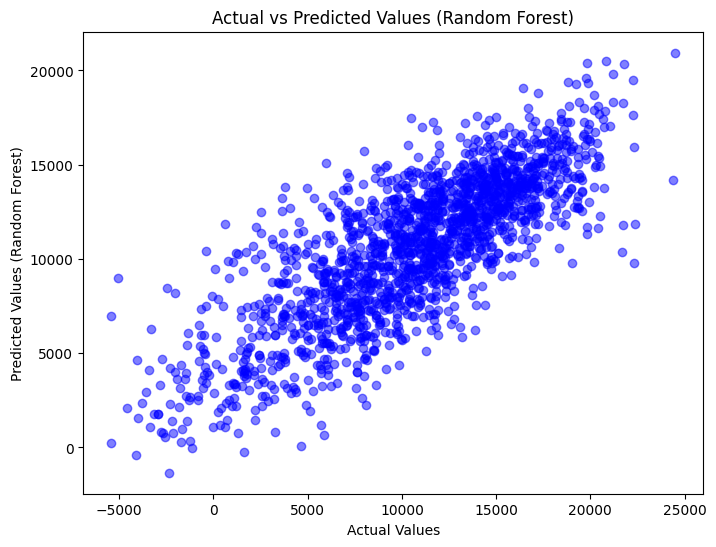

In [1254]:
# Scatter plot for actual vs predicted values (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, y_pred_rf, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Random Forest)')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()

##### **6.2.8. XGBoost:** 

XGBoost, short for Extreme Gradient Boosting, is a machine learning algorithm widely used for its exceptional predictive accuracy and efficiency. Its speed, built-in handling of missing data, and regularization techniques make it a top choice for data scientists and machine learning practitioners. XGBoost is a versatile tool, suitable for a range of tasks from structured data analysis to complex natural language processing and image recognition. With a strong community and a proven track record in machine learning competitions, XGBoost is a valuable asset for creating high-performing predictive models.

##### *6.2.8.1 Fitting the Model:*

In [1255]:
# Create a DMatrix for training data
dtrain = xgb.DMatrix(x_train, label=y_train)

In [1256]:
# Set hyperparameters (you can adjust these based on your problem)
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

In [1257]:
# Train the XGBoost model
model = xgb.train(params, dtrain)

In [1258]:
# Create a DMatrix for testing data
dtest = xgb.DMatrix(x_validate)

In [1259]:
# Make predictions
y_pred = model.predict(dtest)

In [1260]:
# Define your XGBoost model for regression
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100)

# Fit the model to your training data
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_validate)

##### *6.2.8.2 Model Results:*

Mean Squared Error (MSE), R-squared (R2), and Root Mean Squared Error (RMSE):

In [1261]:
mse = mean_squared_error(y_validate, y_pred)
r2 = r2_score(y_validate, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 13750624.090692224
R-squared (R2): 0.5117466394936174


In [1262]:
mse = mean_squared_error(y_validate, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 3708.18339496474


The model evaluation results provide essential insights into its performance. The Mean Squared Error (MSE), which quantifies the average squared difference between predicted and actual values, is 13,750,624.09. This value reflects the typical prediction error, with lower MSE indicating better accuracy. The R-squared (R2) score, measuring how much of the variance in the target variable is explained by the model, is 0.5117, or approximately 51.17%. This suggests that the model successfully captures over 50% of the variance, which is a commendable performance. Additionally, the Root Mean Squared Error (RMSE), at 3,708.18, represents the average prediction error, providing a clear picture of prediction accuracy. Overall, these results indicate a robust model performance, though there's still potential for improvement.

##### *Lets visualise our results:*

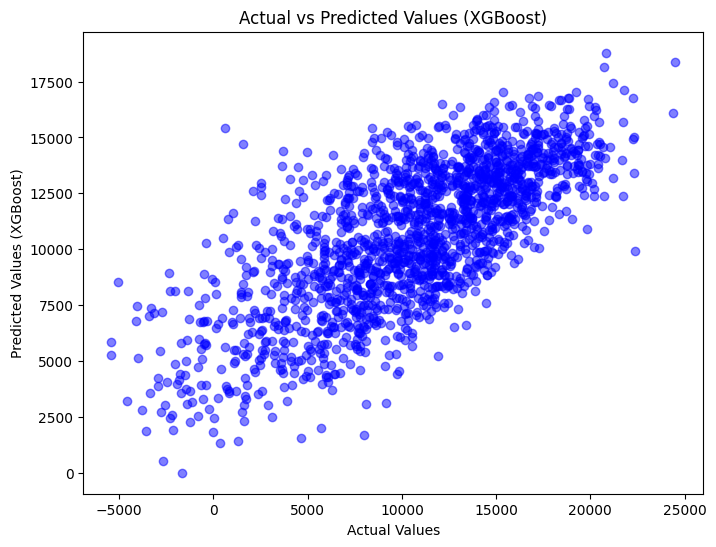

In [1263]:
# Predictions on the validation data using your XGBoost model
predicted_values_xgboost = model.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values_xgboost, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (XGBoost)')
plt.title('Actual vs Predicted Values (XGBoost)')
plt.show()

##### *6.2.8.3 Saving the Model:*

##### **6.2.9. Catboost:** 

##### *6.2.9.1 Fitting the Model:*

Create the model:

In [1264]:
catboost = cb.CatBoostRegressor(random_seed=42)

Fit the model:

In [1265]:
catboost.fit(x_train, y_train)

Learning rate set to 0.055693
0:	learn: 5092.2720291	total: 7.01ms	remaining: 7.01s
1:	learn: 5021.9791331	total: 17ms	remaining: 8.48s
2:	learn: 4937.8331218	total: 23.6ms	remaining: 7.83s
3:	learn: 4864.6594087	total: 33.5ms	remaining: 8.35s
4:	learn: 4806.7084960	total: 45.4ms	remaining: 9.03s
5:	learn: 4741.6104142	total: 53.9ms	remaining: 8.93s
6:	learn: 4691.5855967	total: 65.7ms	remaining: 9.32s
7:	learn: 4641.0582716	total: 71.9ms	remaining: 8.92s
8:	learn: 4588.2562912	total: 81.2ms	remaining: 8.94s
9:	learn: 4542.7912075	total: 87.3ms	remaining: 8.64s
10:	learn: 4505.3948224	total: 97.7ms	remaining: 8.78s
11:	learn: 4465.9140704	total: 104ms	remaining: 8.55s
12:	learn: 4426.8239122	total: 113ms	remaining: 8.61s
13:	learn: 4400.6886380	total: 119ms	remaining: 8.4s
14:	learn: 4373.1160632	total: 128ms	remaining: 8.4s
15:	learn: 4350.4088738	total: 134ms	remaining: 8.24s
16:	learn: 4321.1388338	total: 144ms	remaining: 8.35s
17:	learn: 4292.6436865	total: 151ms	remaining: 8.23s
1

540:	learn: 2504.8563370	total: 4.54s	remaining: 3.85s
541:	learn: 2503.6913706	total: 4.55s	remaining: 3.84s
542:	learn: 2501.1659152	total: 4.55s	remaining: 3.83s
543:	learn: 2499.5703604	total: 4.56s	remaining: 3.83s
544:	learn: 2498.3261084	total: 4.57s	remaining: 3.81s
545:	learn: 2497.4875326	total: 4.58s	remaining: 3.8s
546:	learn: 2496.8689658	total: 4.58s	remaining: 3.79s
547:	learn: 2496.1569687	total: 4.59s	remaining: 3.79s
548:	learn: 2494.1239230	total: 4.6s	remaining: 3.78s
549:	learn: 2493.0225986	total: 4.6s	remaining: 3.77s
550:	learn: 2491.5673476	total: 4.61s	remaining: 3.76s
551:	learn: 2489.4796342	total: 4.62s	remaining: 3.75s
552:	learn: 2487.7983095	total: 4.62s	remaining: 3.74s
553:	learn: 2486.6524084	total: 4.63s	remaining: 3.73s
554:	learn: 2485.8201796	total: 4.63s	remaining: 3.72s
555:	learn: 2484.7383295	total: 4.64s	remaining: 3.71s
556:	learn: 2483.5054585	total: 4.65s	remaining: 3.7s
557:	learn: 2482.8854621	total: 4.66s	remaining: 3.69s
558:	learn: 24

##### *6.2.9.2 Model Results:*

Test the model:

In [1266]:
catboost_pred = catboost.predict(x_validate)

Root Mean Square Error:

In [1267]:
# Calculate RMSE
rmse = metrics.mean_squared_error(y_validate, catboost_pred, squared=False)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3031.8016962461043


R_Squared:

In [1268]:
# Calculate R-squared
r_squared = r2_score(y_validate, catboost_pred)

print("R-squared:", r_squared)

R-squared: 0.6736193412508331


Mean Absolute Error:

In [1269]:
# Calculate MAE
mae = mean_absolute_error(y_validate, catboost_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 2378.8106421935463


Let's visualize our results:

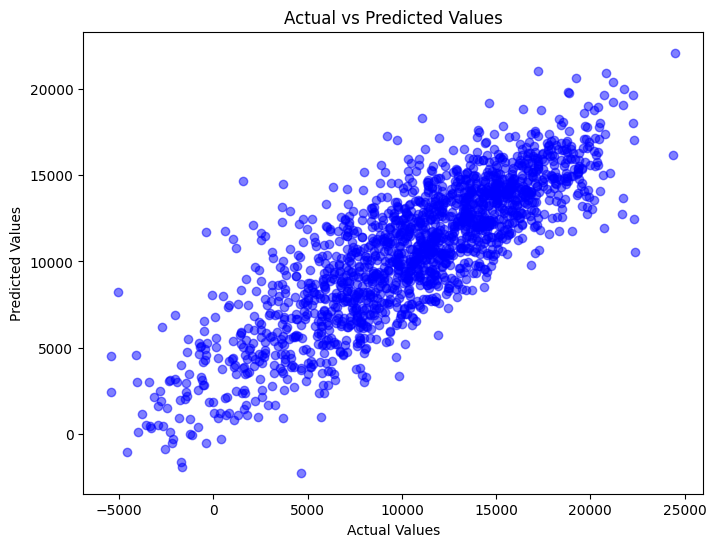

In [1270]:
# Predictions on the validation data
predicted_values = catboost.predict(x_validate)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_validate, predicted_values, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

##### *6.2.9.3 Saving the Model:*

Train model on the complete training dataset:

In [1271]:
catboost.fit(X_standardise, y_data)

Learning rate set to 0.057692
0:	learn: 5111.1371167	total: 16.1ms	remaining: 16.1s
1:	learn: 5037.8345823	total: 33.2ms	remaining: 16.6s
2:	learn: 4956.4955085	total: 50.1ms	remaining: 16.6s
3:	learn: 4880.5142032	total: 68.9ms	remaining: 17.1s
4:	learn: 4813.7937982	total: 86.5ms	remaining: 17.2s
5:	learn: 4752.1930056	total: 113ms	remaining: 18.7s
6:	learn: 4697.7430222	total: 135ms	remaining: 19.1s
7:	learn: 4641.4859990	total: 159ms	remaining: 19.7s
8:	learn: 4591.5827306	total: 180ms	remaining: 19.8s
9:	learn: 4545.2458524	total: 196ms	remaining: 19.5s
10:	learn: 4508.0630639	total: 218ms	remaining: 19.6s
11:	learn: 4464.8897525	total: 229ms	remaining: 18.9s
12:	learn: 4429.9622538	total: 243ms	remaining: 18.4s
13:	learn: 4397.4761143	total: 260ms	remaining: 18.3s
14:	learn: 4366.9701598	total: 275ms	remaining: 18.1s
15:	learn: 4345.1793054	total: 298ms	remaining: 18.3s
16:	learn: 4314.7290904	total: 314ms	remaining: 18.1s
17:	learn: 4288.8793778	total: 321ms	remaining: 17.5s
18:

165:	learn: 3284.7610646	total: 1.69s	remaining: 8.48s
166:	learn: 3282.8841403	total: 1.69s	remaining: 8.45s
167:	learn: 3278.8331388	total: 1.7s	remaining: 8.44s
168:	learn: 3276.2587904	total: 1.71s	remaining: 8.43s
169:	learn: 3272.1272753	total: 1.72s	remaining: 8.41s
170:	learn: 3269.4385446	total: 1.73s	remaining: 8.38s
171:	learn: 3267.7513585	total: 1.74s	remaining: 8.37s
172:	learn: 3263.7341683	total: 1.75s	remaining: 8.37s
173:	learn: 3260.6401461	total: 1.76s	remaining: 8.34s
174:	learn: 3255.8087556	total: 1.76s	remaining: 8.32s
175:	learn: 3252.1439361	total: 1.77s	remaining: 8.3s
176:	learn: 3250.2134318	total: 1.78s	remaining: 8.27s
177:	learn: 3247.4611905	total: 1.79s	remaining: 8.25s
178:	learn: 3243.9524810	total: 1.79s	remaining: 8.23s
179:	learn: 3239.6227732	total: 1.8s	remaining: 8.21s
180:	learn: 3236.8699436	total: 1.81s	remaining: 8.19s
181:	learn: 3233.0880920	total: 1.82s	remaining: 8.19s
182:	learn: 3229.7409497	total: 1.83s	remaining: 8.18s
183:	learn: 3

Make predictions using the test dataset:

In [1272]:
predicted_y_test_cat = catboost.predict(df_test_limited)

In [1273]:
# Make Dataframe from predicted values
cat_pred_df = pd.DataFrame(predicted_y_test_cat, columns=['load_shortfall_3h'])

original_test_df = pd.read_csv("df_test.csv")

# Make Dataframe from corresponding dates
date_df_cat = pd.DataFrame({'time':original_test_df['time']})

# Join dataframes to create a single submission dataframe
submission_df_cat = date_df_cat.join(cat_pred_df)

#Save submission as csv
submission_df_cat.to_csv('Catboost_Predictions', index=False)

submission_df_cat

time  load_shortfall_3h
0     2018-01-01 00:00:00        6389.921536
1     2018-01-01 03:00:00        2860.873410
2     2018-01-01 06:00:00        2086.068312
3     2018-01-01 09:00:00        3651.130940
4     2018-01-01 12:00:00        5164.458275
...                   ...                ...
2915  2018-12-31 09:00:00        8319.074309
2916  2018-12-31 12:00:00        9135.588987
2917  2018-12-31 15:00:00        9682.016543
2918  2018-12-31 18:00:00       10074.949985
2919  2018-12-31 21:00:00       12575.311360

[2920 rows x 2 columns]

<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### **6.1. Model comparisons:** 

In [1274]:
# Compare model performance

### **6.2. Best model:** 

In [1275]:
# Choose best model and motivate why it is the best choice

### **6.3. Kaggle Model Finetuning:** 

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [1276]:
# discuss chosen methods logic